# 5CSO37 Final Project

***Tasks: Linear Regression and Logistic Regression***

## Author Information
- **Name**: Nischal Gurung
- **Student ID**: 2414016
- **Module**: Concepts and Technologies of AI
- **Submission Date**: 2025-02-11

### Objective:

This notebook is all about understanding the dataset, building both regression and classification model which is based on supervised algorithm.

# **Digital Literacy Dataset**

The digital literacy dataset contains 1,000 records and 23 columns that evaluate various aspects of digital literacy among individuals. Key features include demographic data such as age, gender, education level, employment status, household income, and location type. Pre- and post-training scores measure improvements in basic computer knowledge, internet usage, and mobile literacy. Training engagement is captured through metrics like modules completed, session count, average time per module, and quiz performance, alongside user engagement levels. Adaptability and impact metrics assess real-world application of skills, feedback ratings, and the influence on employment prospects. The dataset also provides an overall literacy score summarizing individual progress in digital literacy.

# **Dataset Loading**

The dataset is first loaded into a Pandas DataFrame, and several exploratory steps such as head(), tail(), info(), and shape are performed to understand its structure and contents. These steps allow the user to inspect the first and last few rows, check column data types, identify missing values, and assess the overall size of the dataset. This initial exploration provides a foundation for data cleaning and preprocessing.

### For Logistic Task:

Here, we will explore the dataset to understand the relationships between different features and the target variable (Employment Impact). We will use various visualizations to gain insights into the data.

- Dataset Name: digital_literacy_dataset
- Source: https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset

- Attributes: User_ID, Age, Gender, Education_Level, Employment_Status, Household_Income, Location_Type, Basic_Computer_Knowledge_Score, Internet_Usage_Score, Mobile_Literacy_Score, Post_Training_Basic_Computer_Knowledge_Score, Post_Training_Internet_Usage_Score, Post_Training_Mobile_Literacy_Score, Modules_Completed, Average_Time_Per_Module, Quiz_Performance, Session_Count, Engagement_Level, Adaptability_Score, Feedback_Rating, Skill_Application, Employment_Impact, Overall_Literacy_Score

    

- Target: Employment_Impact
- Sustainable Development Goals:
    - SDG 1 – No Poverty:
Employment_Status, Household_Income, Employment_Impact
    - SDG 4 – Quality Education:
Education_Level, Basic_Computer_Knowledge_Score, Internet_Usage_Score, Mobile_Literacy_Score, Modules_Completed, Quiz_Performance, Overall_Literacy_Score

    - SDG 5 – Gender Equality:
Columns: Gender, Skill_Application, Employment_Impact

    - SDG 8 – Decent Work and Economic Growth:
Employment_Status, Employment_Impact, Skill_Application

    - SDG 9 – Industry, Innovation, and Infrastructure:
Internet_Usage_Score, Mobile_Literacy_Score

    - SDG 10 – Reduced Inequalities:
Household_Income, Location_Type

    - SDG 17 – Partnerships for the Goals:
Engagement_Level, Feedback_Rating






This dataset provides insights into digital literacy levels by analyzing demographic factors, education, employment status, and digital skills. It evaluates individuals' computer and mobile literacy, internet usage, and learning engagement to assess their adaptability and the impact of digital skills on employment. The dataset helps identify education gaps, employment challenges, and digital inclusion trends across different regions and socio-economic backgrounds.


##### Initial Inspection:

**Rows:** 1000

**Columns:** 23

**Columns Details:**
- User_ID, Age, Gender, Education_Level, Employment_Status, Household_Income, Location_Type, Basic_Computer_Knowledge_Score, Internet_Usage_Score, Mobile_Literacy_Score, Post_Training_Basic_Computer_Knowledge_Score, Post_Training_Internet_Usage_Score, Post_Training_Mobile_Literacy_Score, Modules_Completed, Average_Time_Per_Module, Quiz_Performance, Session_Count, Engagement_Level, Adaptability_Score, Feedback_Rating, Skill_Application, Employment_Impact, Overall_Literacy_Score




Goal: Predict Employment_Impact based on provided features.

In [465]:
# Mounting Google Drive to access datasets stored in the user's drive.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [466]:
# Importing all required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_classif


In [467]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Datasets/digital_literacy_dataset.csv'
df = pd.read_csv(file_path)

In [468]:
df

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,...,15,28.28,61,20,Low,98,4,85,No,73.1
996,U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,...,13,14.06,73,26,Medium,74,2,76,No,60.5
997,U0998,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,...,7,29.91,65,14,Low,66,1,86,Yes,63.8
998,U0999,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,...,12,28.34,91,21,High,83,4,73,Yes,60.0


### Dataset Overview
This command provides an overview of the dataset, including column names, data types, and non-null values.

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   User_ID                                       1000 non-null   object 
 1   Age                                           1000 non-null   int64  
 2   Gender                                        1000 non-null   object 
 3   Education_Level                               788 non-null    object 
 4   Employment_Status                             1000 non-null   object 
 5   Household_Income                              1000 non-null   object 
 6   Location_Type                                 1000 non-null   object 
 7   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 8   Internet_Usage_Score                          1000 non-null   int64  
 9   Mobile_Literacy_Score                         1000 non-null   in

In [470]:
df.dtypes

,0
User_ID,object
Age,int64
Gender,object
Education_Level,object
Employment_Status,object
Household_Income,object
Location_Type,object
Basic_Computer_Knowledge_Score,int64
Internet_Usage_Score,int64
Mobile_Literacy_Score,int64


In [471]:
df.shape

(1000, 23)

In [472]:
df.head(10)

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3
5,U0006,57,Female,High School,Self-Employed,Low,Rural,15,3,46,...,12,29.85,66,25,Low,87,2,75,No,47.4
6,U0007,46,Other,Secondary,Unemployed,Low,Semi-Rural,35,34,49,...,6,24.54,61,23,Medium,79,3,93,No,78.3
7,U0008,36,Male,High School,Unemployed,Low,Rural,19,48,46,...,10,24.12,86,22,Low,81,5,70,Yes,59.4
8,U0009,64,Male,High School,Other,Low,Rural,33,10,37,...,7,15.68,65,24,Medium,78,2,75,No,63.3
9,U0010,61,Female,High School,Self-Employed,Medium,Rural,50,18,20,...,14,12.19,80,17,Low,64,3,95,Yes,60.2


In [473]:
df.tail(10)

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
990,U0991,24,Female,NaN,Student,Low,Semi-Rural,1,15,20,...,10,19.34,91,11,Medium,57,4,68,Yes,45.8
991,U0992,45,Female,Secondary,Unemployed,Medium,Rural,22,42,7,...,9,22.95,88,18,Low,53,5,83,Yes,56.9
992,U0993,44,Male,High School,Other,Medium,Semi-Rural,34,1,18,...,6,21.72,84,13,Medium,63,3,75,No,46.3
993,U0994,39,Male,NaN,Other,Low,Semi-Rural,14,34,38,...,12,21.52,83,19,Medium,98,1,78,No,63.4
994,U0995,21,Male,Primary,Other,Medium,Rural,26,41,44,...,8,18.25,75,12,High,64,4,83,No,71.4
995,U0996,30,Female,Primary,Unemployed,Low,Rural,18,49,27,...,15,28.28,61,20,Low,98,4,85,No,73.1
996,U0997,30,Female,Secondary,Student,Medium,Rural,25,24,24,...,13,14.06,73,26,Medium,74,2,76,No,60.5
997,U0998,31,Female,Secondary,Farmer,Low,Semi-Rural,35,19,36,...,7,29.91,65,14,Low,66,1,86,Yes,63.8
998,U0999,62,Male,Secondary,Farmer,Medium,Rural,39,12,47,...,12,28.34,91,21,High,83,4,73,Yes,60.0
999,U1000,27,Female,NaN,Unemployed,Low,Rural,13,45,24,...,9,23.25,73,25,Medium,52,5,55,No,57.1


# **Data Cleaning**

Data cleaning is performed to address missing values and duplicates. For the Education_Level column, missing values are replaced with the mode (most frequently occurring value) to maintain consistency and avoid losing valuable data. Duplicate rows in the dataset are identified and handled to ensure there are no redundant entries, which could skew analysis or model performance.

In [474]:
# Checking NULL values
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Education_Level,212
Employment_Status,0
Household_Income,0
Location_Type,0
Basic_Computer_Knowledge_Score,0
Internet_Usage_Score,0
Mobile_Literacy_Score,0


In [475]:
# Filling mode in Missing value
df["Education_Level"] = df["Education_Level"].fillna(df["Education_Level"].mode()[0])

In [476]:
# Remove duplicate rows
df.duplicated().sum()

0

# **Categorical Encoding**

Categorical encoding is applied to transform non-numeric categorical columns such as Gender, Education_Level, and Employment_Status into numeric values. This is achieved using the astype('category').cat.codes method, which assigns numeric codes to each unique category. This transformation is essential for machine learning models, as they require numerical inputs for processing.

In [477]:
# Define categorical columns to convert
categorical_cols = ["Gender", "Education_Level", "Employment_Status",
                     "Household_Income", "Location_Type", "Engagement_Level", "Employment_Impact"]

# Convert categorical columns to integer values
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  # Converts categories to numerical values

df.head(10)

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,1,1,3,2,1,25,1,33,...,7,15.85,92,12,1,77,4,51,1,58.2
1,U0002,60,0,0,0,1,0,22,14,35,...,9,22.24,88,24,1,76,4,98,1,55.3
2,U0003,47,0,1,0,1,1,14,31,14,...,13,12.15,67,17,1,67,5,75,1,52.3
3,U0004,34,0,2,0,1,0,6,32,17,...,8,25.59,69,28,2,59,1,61,1,55.5
4,U0005,50,1,0,1,2,0,14,41,19,...,8,16.65,76,10,2,90,4,82,0,59.3
5,U0006,57,0,0,2,1,0,15,3,46,...,12,29.85,66,25,1,87,2,75,0,47.4
6,U0007,46,2,2,4,1,1,35,34,49,...,6,24.54,61,23,2,79,3,93,0,78.3
7,U0008,36,1,0,4,1,0,19,48,46,...,10,24.12,86,22,1,81,5,70,1,59.4
8,U0009,64,1,0,1,1,0,33,10,37,...,7,15.68,65,24,2,78,2,75,0,63.3
9,U0010,61,0,0,2,2,0,50,18,20,...,14,12.19,80,17,1,64,3,95,1,60.2


# **Classification Tasks**

# **Dropping Irrelevant Columns**

Irrelevant columns, such as User_ID, are dropped, as they do not contribute to the analysis. Additionally, target variables like Overall_Literacy_Score and Skill_Application are excluded, signaling a focus on building classification models. These preprocessing steps prepare the dataset for further analysis and modeling, ensuring it is clean and machine-learning-ready.

In [478]:
# Drop User ID Column and other Target variable
class_df = df.drop(columns=['User_ID', 'Overall_Literacy_Score', 'Skill_Application'])
class_df

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Employment_Impact
0,43,1,1,3,2,1,25,1,33,54,50,72,7,15.85,92,12,1,77,4,1
1,60,0,0,0,1,0,22,14,35,52,39,76,9,22.24,88,24,1,76,4,1
2,47,0,1,0,1,1,14,31,14,46,52,61,13,12.15,67,17,1,67,5,1
3,34,0,2,0,1,0,6,32,17,36,73,64,8,25.59,69,28,2,59,1,1
4,50,1,0,1,2,0,14,41,19,44,87,52,8,16.65,76,10,2,90,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,0,1,4,1,0,18,49,27,62,99,62,15,28.28,61,20,1,98,4,0
996,30,0,2,3,2,0,25,24,24,50,73,62,13,14.06,73,26,2,74,2,0
997,31,0,2,0,1,1,35,19,36,71,46,72,7,29.91,65,14,1,66,1,1
998,62,1,2,0,2,0,39,12,47,69,37,71,12,28.34,91,21,0,83,4,1


In [479]:
class_df.columns.tolist()

['Age',
 'Gender',
 'Education_Level',
 'Employment_Status',
 'Household_Income',
 'Location_Type',
 'Basic_Computer_Knowledge_Score',
 'Internet_Usage_Score',
 'Mobile_Literacy_Score',
 'Post_Training_Basic_Computer_Knowledge_Score',
 'Post_Training_Internet_Usage_Score',
 'Post_Training_Mobile_Literacy_Score',
 'Modules_Completed',
 'Average_Time_Per_Module',
 'Quiz_Performance',
 'Session_Count',
 'Engagement_Level',
 'Adaptability_Score',
 'Feedback_Rating',
 'Employment_Impact']

In [480]:
class_df.shape

(1000, 20)

# **Exploratory Data Analysis (EDA)**

The .describe() function in Pandas provides a quick statistical summary of numerical columns in a dataset, including key metrics like count (number of non-missing values), mean (average value), standard deviation (data spread), min/max (range of values), and percentiles (distribution breakdown).

In [481]:
class_df.describe()

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Employment_Impact
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.864000,0.62400,1.026000,2.092000,1.161000,0.298000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,1.275000,74.840000,2.998000,0.295000
std,13.573568,0.64268,0.716825,1.453151,0.616002,0.457608,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,0.773287,14.446907,1.407827,0.456271
min,18.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,0.000000,50.000000,1.000000,0.000000
25%,29.000000,0.00000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,1.000000,63.000000,2.000000,0.000000
50%,41.000000,1.00000,1.000000,2.000000,1.000000,0.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,1.000000,75.000000,3.000000,0.000000
75%,52.000000,1.00000,2.000000,3.000000,2.000000,1.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,2.000000,87.000000,4.000000,1.000000
max,64.000000,2.00000,2.000000,4.000000,2.000000,1.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,2.000000,100.000000,5.000000,1.000000


In [482]:
class_df.nunique()

,0
Age,47
Gender,3
Education_Level,3
Employment_Status,5
Household_Income,3
Location_Type,2
Basic_Computer_Knowledge_Score,51
Internet_Usage_Score,51
Mobile_Literacy_Score,51
Post_Training_Basic_Computer_Knowledge_Score,77


In [483]:
class_df.var()

,0
Age,184.241746
Gender,0.413037
Education_Level,0.513838
Employment_Status,2.111648
Household_Income,0.379458
Location_Type,0.209405
Basic_Computer_Knowledge_Score,220.179279
Internet_Usage_Score,226.354671
Mobile_Literacy_Score,225.061077
Post_Training_Basic_Computer_Knowledge_Score,297.170289


Columns with near-zero variance are dropped because they don't provide meaningful information for prediction, as their values are almost identical. Removing them simplifies the model and improves performance.

In [484]:
class_df = class_df.drop(columns=['Gender', 'Education_Level', 'Household_Income', 'Location_Type', 'Engagement_Level'])

# **Data Visualization**


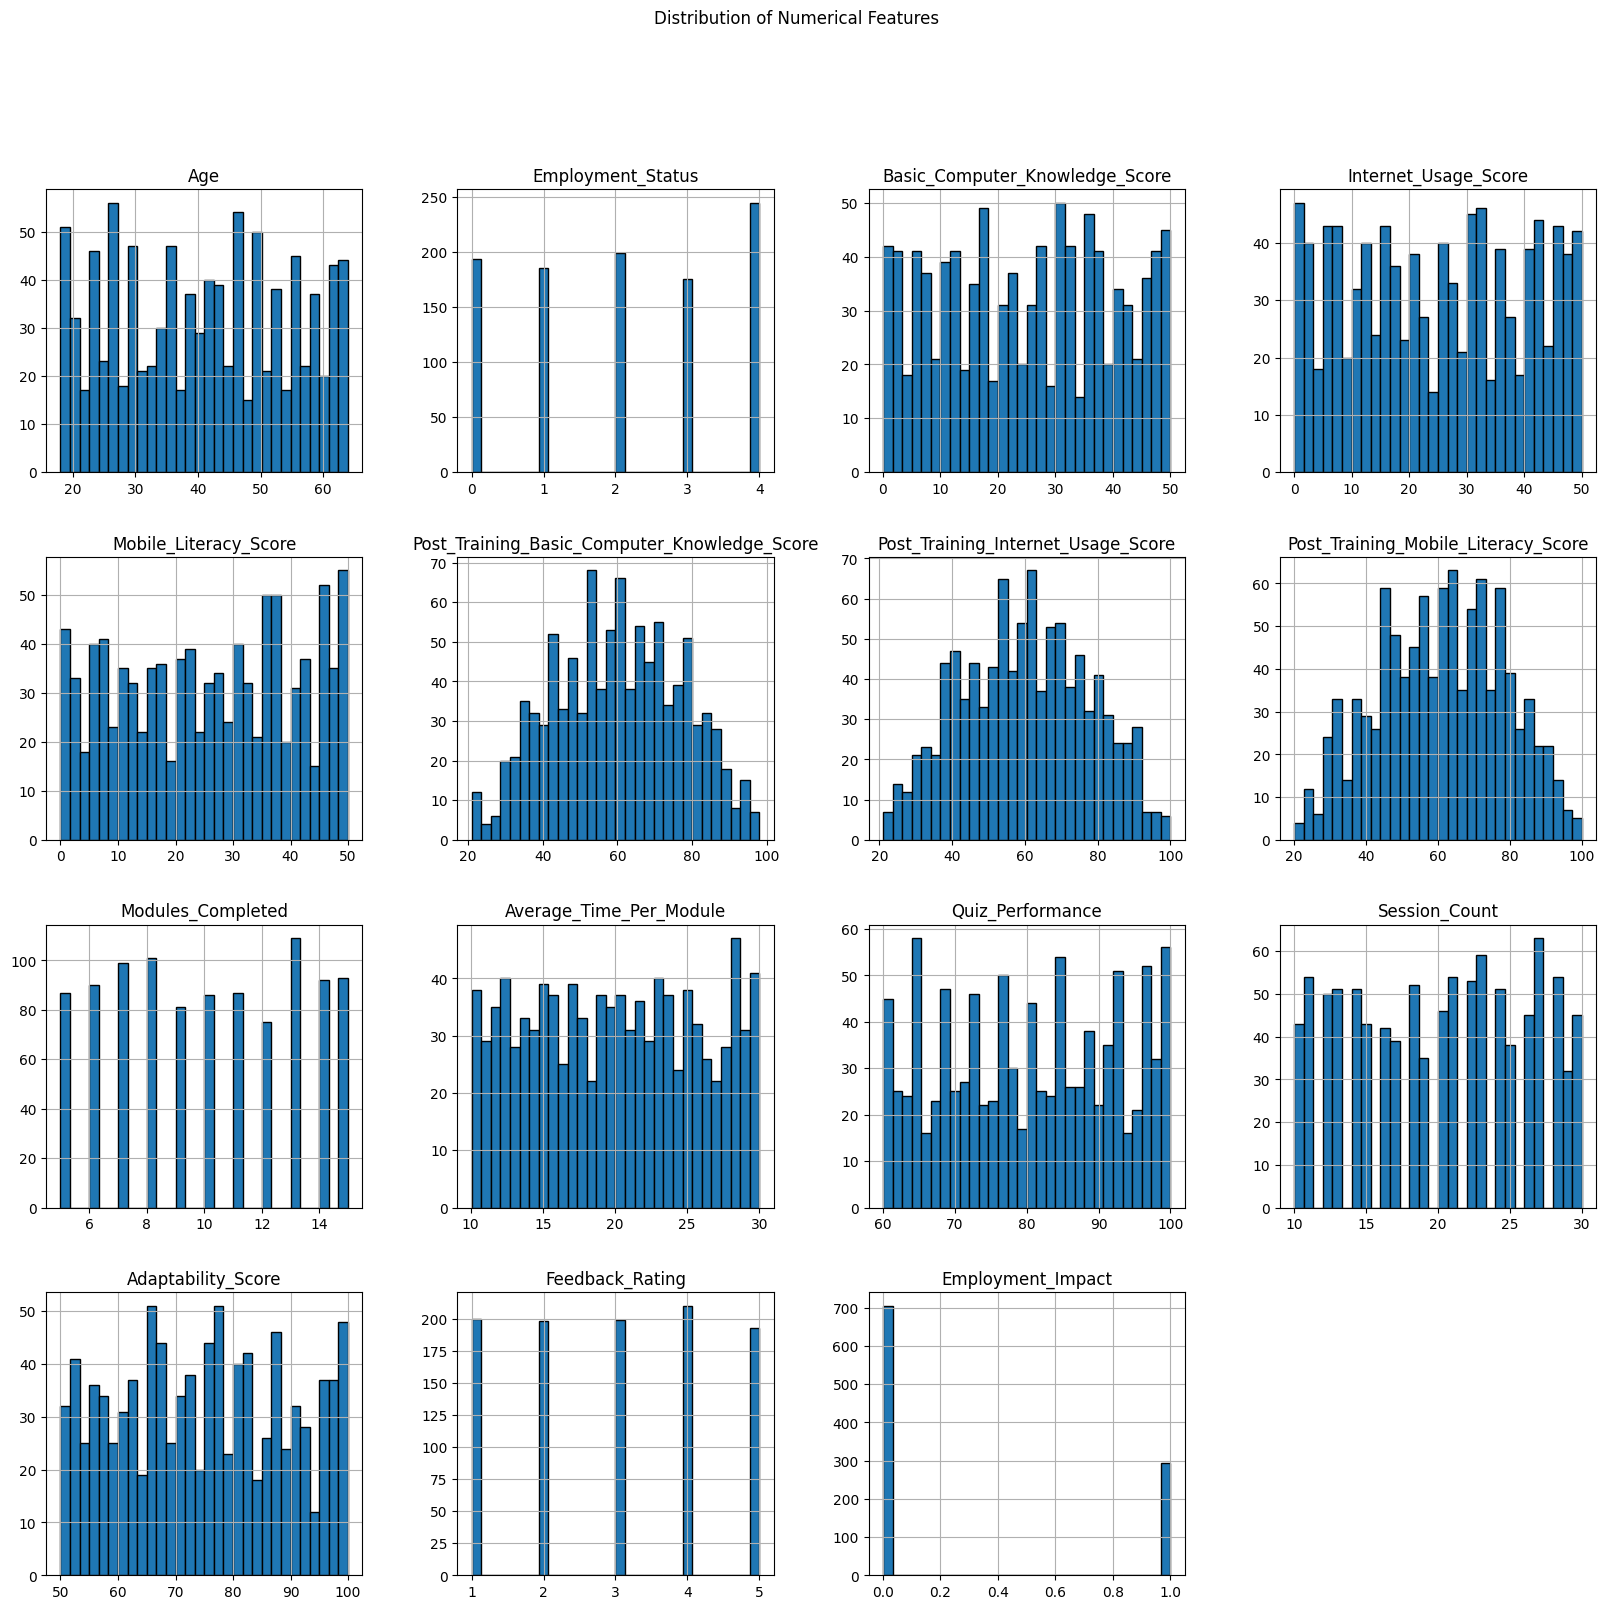

In [485]:
# Histogram of Numerical Features
class_df.hist(figsize=(20, 18), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

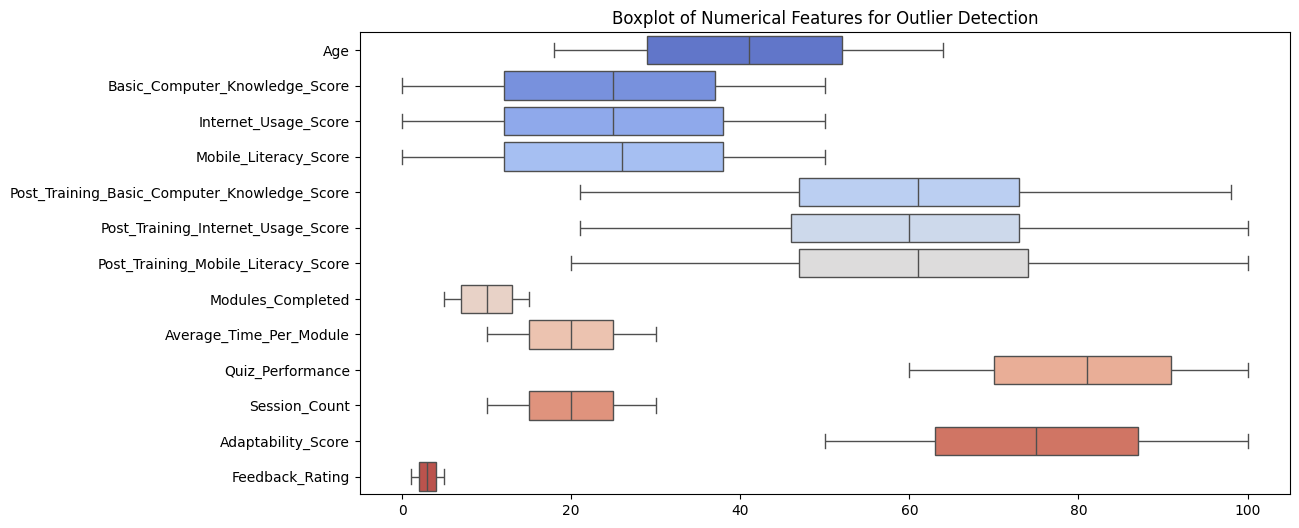

In [486]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=class_df.select_dtypes(include=['int64', 'float64']), orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

A correlation matrix is a table that shows the correlation coefficients between several variables in a dataset. Each cell in the matrix represents the correlation between two variables, with values ranging from -1 to 1. A correlation of 1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 means no linear relationship. The matrix helps identify relationships between variables, which can be useful for feature selection or identifying multicollinearity in a dataset.

In [487]:
correlation_matrix = class_df.corr()
correlation_matrix

,Age,Employment_Status,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Employment_Impact
Age,1.000000,0.026060,0.028388,0.018959,0.027268,0.039054,0.027523,0.024820,0.011264,-0.048144,0.004965,0.018996,0.011808,0.008419,0.017152
Employment_Status,0.026060,1.000000,0.004306,0.031884,-0.035401,-0.015623,0.012228,-0.049951,-0.002382,0.009811,-0.009648,0.025408,-0.016320,-0.007249,-0.033426
Basic_Computer_Knowledge_Score,0.028388,0.004306,1.000000,-0.003584,0.027195,0.859719,0.004516,0.019964,-0.021419,-0.016940,0.020257,-0.019960,-0.008666,0.001722,-0.072469
Internet_Usage_Score,0.018959,0.031884,-0.003584,1.000000,0.012740,0.002204,0.859825,0.007216,-0.054988,-0.035309,-0.033528,-0.040614,-0.021224,0.029284,-0.009404
Mobile_Literacy_Score,0.027268,-0.035401,0.027195,0.012740,1.000000,0.014443,0.030787,0.861993,-0.032856,0.052439,-0.055774,0.015265,0.071849,0.001680,-0.058460
Post_Training_Basic_Computer_Knowledge_Score,0.039054,-0.015623,0.859719,0.002204,0.014443,1.000000,0.012639,0.012960,0.001364,-0.062192,0.005791,-0.008403,-0.013816,0.004219,-0.056454
Post_Training_Internet_Usage_Score,0.027523,0.012228,0.004516,0.859825,0.030787,0.012639,1.000000,0.009174,-0.070527,-0.003169,-0.007207,-0.015813,0.011348,0.036787,-0.017201
Post_Training_Mobile_Literacy_Score,0.024820,-0.049951,0.019964,0.007216,0.861993,0.012960,0.009174,1.000000,-0.009472,0.049120,-0.048310,0.035691,0.030999,0.024623,-0.074180
Modules_Completed,0.011264,-0.002382,-0.021419,-0.054988,-0.032856,0.001364,-0.070527,-0.009472,1.000000,0.045163,0.020539,0.042103,-0.001336,0.042827,0.034755
Average_Time_Per_Module,-0.048144,0.009811,-0.016940,-0.035309,0.052439,-0.062192,-0.003169,0.049120,0.045163,1.000000,0.010383,-0.062206,-0.023591,0.042021,-0.007186


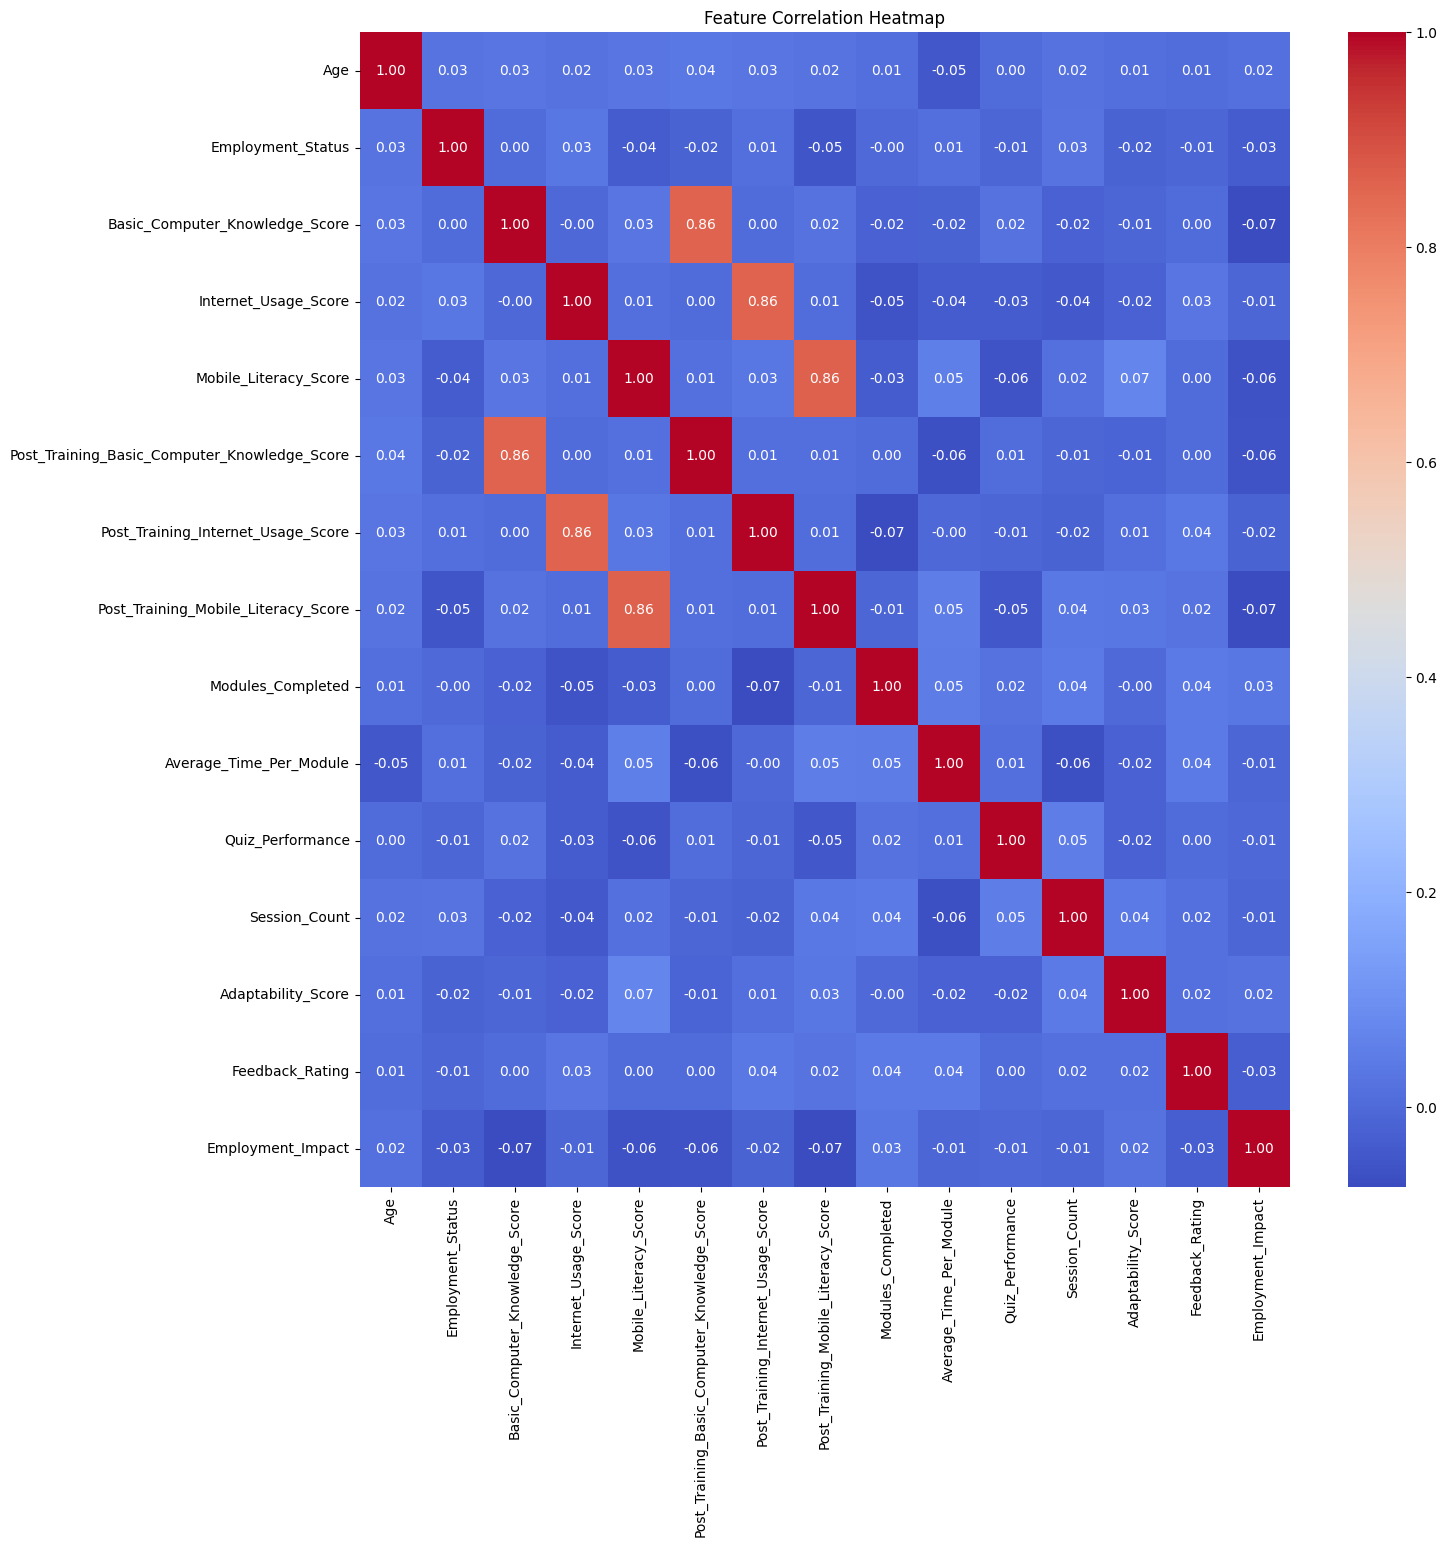

In [488]:
# Plot Heatmap of all feature correlations
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

A threshold of 0.8 in a correlation matrix helps identify highly correlated features that are redundant, which can improve model performance by removing unnecessary variables and reducing multicollinearity.

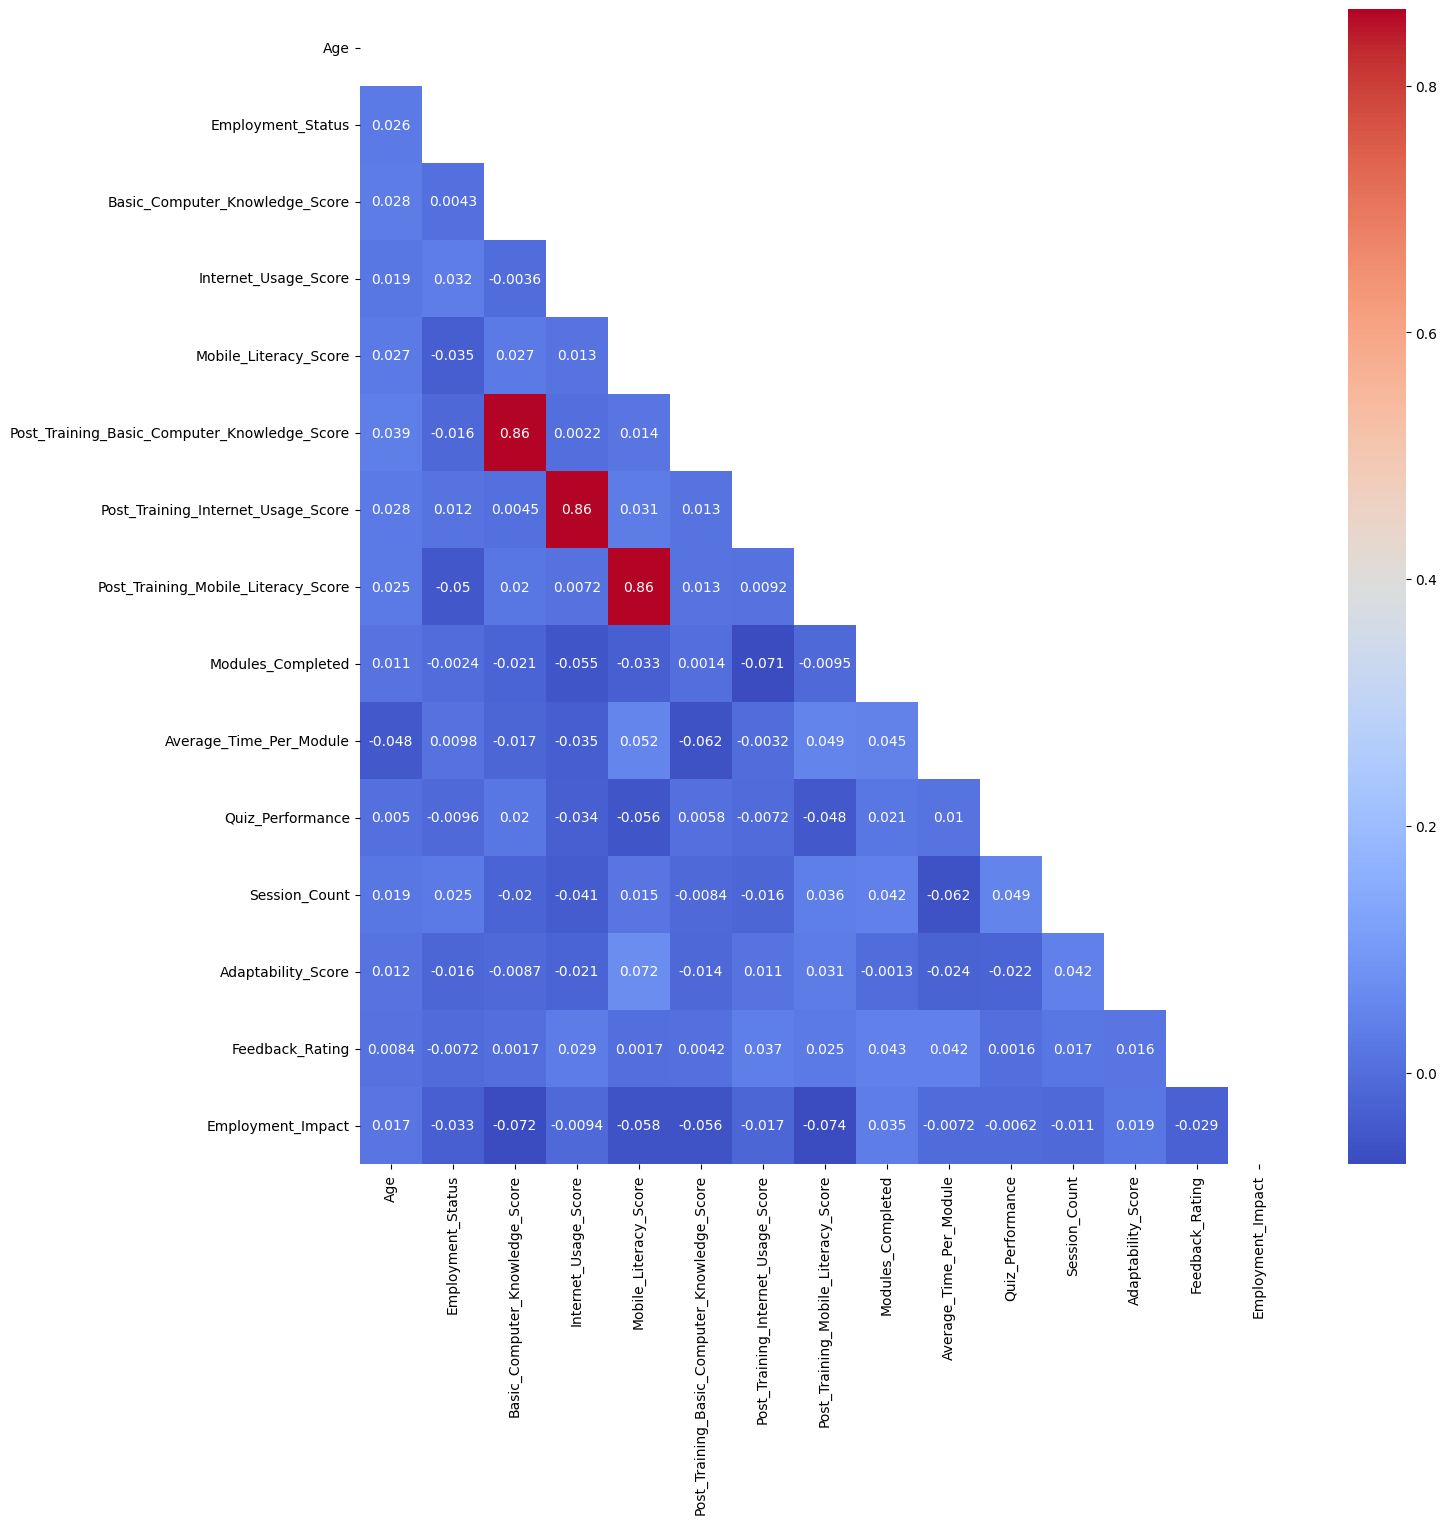

In [489]:
# Set the threshold for considering a correlation as "high"
threshold = 0.8

# Find pairs of highly correlated columns
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

corr = class_df.corr()
matrix = np.triu(corr)  # For triangular matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

In [490]:
# Drop the highly correlated columns
class_df_reduced = class_df.drop(columns=to_drop)

# Display dropped columns and remaining columns
print(f"\nColumns dropped: {to_drop}")
print(f"\nRemaining columns: {class_df_reduced.columns.tolist()}")


Columns dropped: ['Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score']

Remaining columns: ['Age', 'Employment_Status', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Employment_Impact']


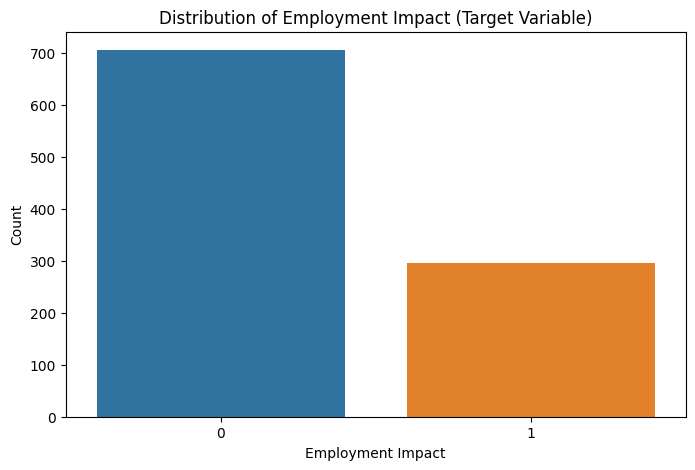

In [491]:
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x="Employment_Impact", data=class_df_reduced, hue="Employment_Impact", legend=False)

plt.title("Distribution of Employment Impact (Target Variable)")
plt.xlabel("Employment Impact")
plt.ylabel("Count")
plt.show()


#**Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance data**

SMOTE generates synthetic samples for the minority class to address class imbalance. It helps improve model performance by balancing the dataset.

In [492]:
# Display class distribution before SMOTE
print("Before SMOTE:")
class_df_reduced['Employment_Impact'].value_counts()

Before SMOTE:


,count
Employment_Impact,
0,705
1,295


In [493]:
# Define independent variables (features) and target variable
X = class_df_reduced.drop(columns=['Employment_Impact'])
y = class_df_reduced['Employment_Impact']

In [494]:
# Split data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [495]:
# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [496]:
# Check class distribution after SMOTE
print("After SMOTE:\n")
y_train_smote.value_counts()

After SMOTE:



,count
Employment_Impact,
0,564
1,564


# **Logistic Regression From Scratch for Classification**

In [497]:
import numpy as np

# Encoding categorical target variable
unique_classes = class_df_reduced["Employment_Impact"].unique()
class_mapping = {k: v for v, k in enumerate(unique_classes)}
class_df_reduced["Employment_Impact"] = class_df_reduced["Employment_Impact"].map(class_mapping)

# Feature selection
Features = ['Age', 'Employment_Status','Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
            'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
            'Adaptability_Score', 'Feedback_Rating']
X = class_df_reduced[Features].values
y = class_df_reduced["Employment_Impact"].values

# Manual Standardization Function
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Standardizing features
X = standardize(X)

# Train-test split (80-20)
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = np.dot(X.T, (y_predicted - y)) / len(y)
            db = np.sum(y_predicted - y) / len(y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])

# Train Logistic Regression
log_reg = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluation Metrics from Scratch
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if tp + fn > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if p + r > 0 else 0

# Evaluate Logistic Regression Model
print("\n Logistic Regression Performance:")
print("\nTraining Data:")
print(f"Accuracy: {accuracy(y_train, y_train_pred):.2f}")
print(f"Precision: {precision(y_train, y_train_pred):.2f}")
print(f"Recall: {recall(y_train, y_train_pred):.2f}")
print(f"F1 Score: {f1_score(y_train, y_train_pred):.2f}")

print("\nTest Data:")
print(f"Accuracy: {accuracy(y_test, y_test_pred):.2f}")
print(f"Precision: {precision(y_test, y_test_pred):.2f}")
print(f"Recall: {recall(y_test, y_test_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.2f}")



 Logistic Regression Performance:

Training Data:
Accuracy: 0.69
Precision: 0.69
Recall: 1.00
F1 Score: 0.82

Test Data:
Accuracy: 0.77
Precision: 0.77
Recall: 1.00
F1 Score: 0.87


The model has an accuracy of 0.77, with precision and recall both indicating strong performance. Precision is 0.77, meaning 77% of predicted positives were correct, while recall is perfect at 1.00, identifying all positive cases. The F1 score of 0.87 reflects a good balance between precision and recall, though some false positives may be present.

#**Decision Tree using library for Classification Tasks**

In [498]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree Classifier
print("\n Decision Tree Performance:")

print("\nTraining Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_dt):.2f}")
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred_dt))

print("\nTest Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dt):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_dt))



 Decision Tree Performance:

Training Data:
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.15      0.26       249
           1       0.72      1.00      0.84       551

    accuracy                           0.73       800
   macro avg       0.84      0.57      0.55       800
weighted avg       0.79      0.73      0.66       800


Test Data:
Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.04      0.07        46
           1       0.77      0.95      0.85       154

    accuracy                           0.74       200
   macro avg       0.48      0.50      0.46       200
weighted avg       0.64      0.74      0.67       200



The decision tree model has an accuracy of 0.74, meaning it correctly predicted 74% of the time.

About Confusion matrix:





*   True label 0, Predicted label 0 (2): These are the cases where the model correctly predicted class 0 (true negative).
*   True label 0, Predicted label 1 (44): These are false positives, where the model incorrectly predicted class 1 for instances that are actually class 0.
*   True label 1, Predicted label 0 (8): These are false negatives, where the model incorrectly predicted class 0 for instances that are actually class 1.
*   True label 1, Predicted label 1 (146): These are true positives, where the model correctly predicted class 1.





# **Hyper Parameter Tuning with Decision Tree for classification Task**

In [499]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
# Best Parameters
print("Best Parameters:\n", grid_search.best_params_)

# Train best Decision Tree model
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the tuned Decision Tree
print("\n Tuned Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Best Parameters:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Tuned Decision Tree Performance:
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.02      0.04        46
           1       0.77      0.96      0.85       154

    accuracy                           0.74       200
   macro avg       0.45      0.49      0.45       200
weighted avg       0.62      0.74      0.67       200









*   Criterion: 'gini': This means the Gini impurity is used to measure the quality of a split.

*   Max Depth: 3 : The depth of the tree is limited to 3 levels, helping prevent overfitting by keeping the tree shallow.

*   Max Features: None : This means all features are considered when splitting a node.
*   Min Samples Leaf: 1 : Each leaf must have at least one sample, which is the default behavior.


*   Min Samples Split: 2 : A node must have at least 2 samples before it can be split.





# **Features Selection with Decision Tree for Classification Tasks**

Selected Features:
 ['Age', 'Employment_Status', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score']

 Decision Tree Performance with Feature Selection:
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.04      0.07        46
           1       0.77      0.95      0.85       154

    accuracy                           0.74       200
   macro avg       0.48      0.50      0.46       200
weighted avg       0.64      0.74      0.67       200



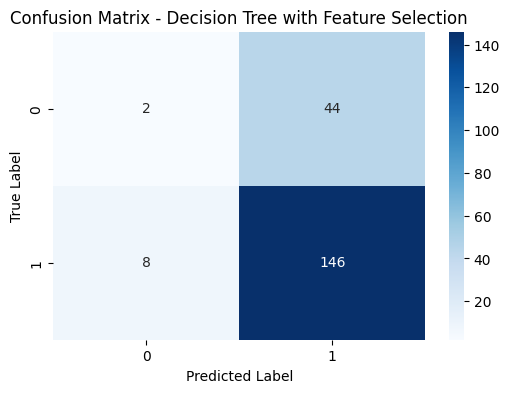

In [500]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_
feature_names = Features  # Get column names

# Select top features based on importance threshold
importance_threshold = 0.01  # Adjust threshold as needed
important_features = [feature_names[i] for i in range(len(feature_importances)) if feature_importances[i] > importance_threshold]

# Print selected feature names
print("Selected Features:\n", important_features)

# Reduce dataset to selected features
X_train_selected = X_train[:, [Features.index(col) for col in important_features]]
X_test_selected = X_test[:, [Features.index(col) for col in important_features]]

# Retrain Decision Tree on selected features
dt_model_selected = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
dt_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_dt = dt_model_selected.predict(X_test_selected)

# Evaluate Decision Tree Classifier
print("\n Decision Tree Performance with Feature Selection:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree with Feature Selection")
plt.show()

The output shows the features selected by the decision tree model for making predictions. These include **Age**, **Employment_Status**, **Basic_Computer_Knowledge_Score**, **Internet_Usage_Score**, **Mobile_Literacy_Score**, **Modules_Completed**, **Average_Time_Per_Module**, **Quiz_Performance**, **Session_Count**, and **Adaptability_Score**. These features were chosen because they provide significant information to help the model distinguish between different classes. The decision tree likely determined that these variables are the most influential in reducing impurity at the nodes, making them crucial for accurate predictions. By focusing on these features, the model can improve its ability to predict outcomes effectively.

# **KNN using library for Classification Tasks**

In [501]:
# Train K-Nearest Neighbors (KNN) Classifier
k = 5  # Choosing k=5 as default
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on train and test data
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Evaluate KNN Classifier on Training Data
print("\n KNN Classifier Performance on Training Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# Evaluate KNN Classifier on Test Data
print("\n KNN Classifier Performance on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



 KNN Classifier Performance on Training Data:
Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.39      0.48       249
           1       0.76      0.89      0.82       551

    accuracy                           0.74       800
   macro avg       0.69      0.64      0.65       800
weighted avg       0.72      0.74      0.72       800


 KNN Classifier Performance on Test Data:
Accuracy: 0.61

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17        46
           1       0.75      0.74      0.75       154

    accuracy                           0.61       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.62      0.61      0.61       200



On training, The KNN (K-Nearest Neighbors) classifier has an accuracy of 0.74 and on testing it has 0.61, meaning it correctly predicted the target variable 74% of the time on Training and 61% on testing. This indicates that the model performs moderately well

# **Hyper Parameter Tuning with KNN for Classification**

In [502]:
# Define parameter grid
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Testing k values from 1 to 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:\n", grid_search.best_params_)

# Train best KNN model
best_knn_model = grid_search.best_estimator_
best_knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = best_knn_model.predict(X_test)

# Evaluate the tuned KNN model
print("\n Tuned KNN Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

Best Parameters:
 {'metric': 'manhattan', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

 Tuned KNN Classifier Performance:
Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.75      0.90      0.82       154

    accuracy                           0.69       200
   macro avg       0.38      0.45      0.41       200
weighted avg       0.58      0.69      0.63       200



# **Features Selection with KNN Algorithm for Classification**

Selected Features:
 ['Age', 'Employment_Status', 'Basic_Computer_Knowledge_Score', 'Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating']

 KNN Classifier Performance with Feature Selection:
Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.15      0.16        46
           1       0.75      0.76      0.75       154

    accuracy                           0.62       200
   macro avg       0.45      0.46      0.46       200
weighted avg       0.61      0.62      0.62       200



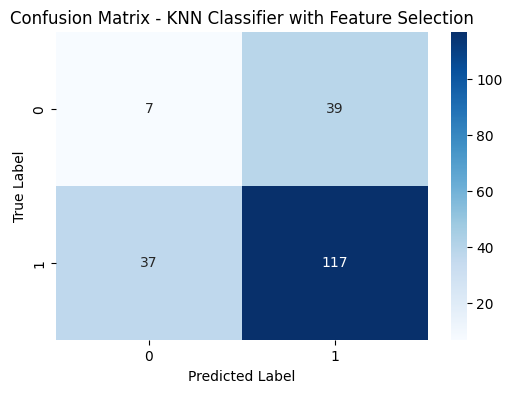

In [503]:
# Perform Feature Selection using SelectKBest
k_best_features = 10  # Choose top k best features
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [Features[i] for i in selected_feature_indices]
print("Selected Features:\n", selected_feature_names)

# Train K-Nearest Neighbors (KNN) Classifier
k = 5  # Choosing k=5 as default
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_selected, y_train)  # Now y_train is categorical

# Make predictions
y_pred_knn = knn_model.predict(X_test_selected)

# Evaluate KNN Classifier
print("\n KNN Classifier Performance with Feature Selection:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

#Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Classifier with Feature Selection")
plt.show()

The output shows the selected features used for the KNN classifier after feature selection, which includes Age, Employment_Status, Basic_Computer_Knowledge_Score, Mobile_Literacy_Score, Modules_Completed, Average_Time_Per_Module, Quiz_Performance, Session_Count, Adaptability_Score, and Feedback_Rating.

# **Final Model With Decision Tree (Classification)**


Decision Tree Performance on Training Data:
Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.04      0.07       220
           1       0.73      1.00      0.85       580

    accuracy                           0.73       800
   macro avg       0.87      0.52      0.46       800
weighted avg       0.81      0.73      0.63       800



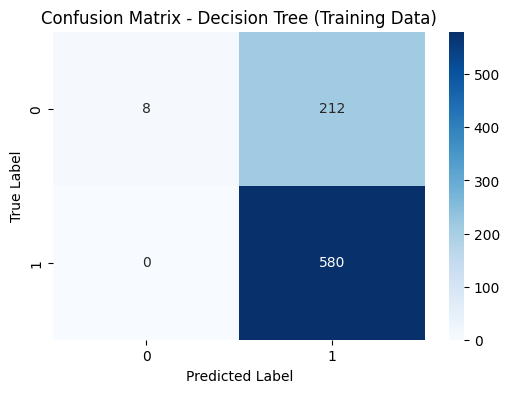


Decision Tree Performance on Test Data:
Accuracy: 0.62

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        75
           1       0.62      0.99      0.77       125

    accuracy                           0.62       200
   macro avg       0.31      0.50      0.38       200
weighted avg       0.39      0.62      0.48       200



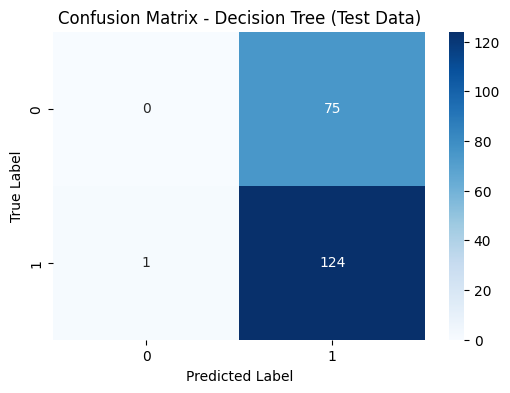

In [504]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Optimized Decision Tree Model
best_cls_model = DecisionTreeClassifier(max_depth=3, random_state=42)
best_cls_model.fit(X_train_selected, y_train)

# Predictions on Train and Test data
y_train_pred = best_cls_model.predict(X_train_selected)
y_test_pred = best_cls_model.predict(X_test_selected)

# Evaluate on Training Data
print("\nDecision Tree Performance on Training Data:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

# Confusion Matrix - Training Data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree (Training Data)")
plt.show()

# Evaluate on Test Data
print("\nDecision Tree Performance on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix - Test Data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree (Test Data)")
plt.show()


On training data, the final model using the decision tree has an accuracy of 0.73 and On testing data it has 0.62, meaning it correctly predicted the target variable 73 % of the time on training and 62% on testing.

# **REGRESSION TASKS**

In [505]:
# Drop User ID Column and other Target variable
reg_df = df.drop(columns=['User_ID', 'Employment_Impact', 'Skill_Application'])
reg_df

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Overall_Literacy_Score
0,43,1,1,3,2,1,25,1,33,54,50,72,7,15.85,92,12,1,77,4,58.2
1,60,0,0,0,1,0,22,14,35,52,39,76,9,22.24,88,24,1,76,4,55.3
2,47,0,1,0,1,1,14,31,14,46,52,61,13,12.15,67,17,1,67,5,52.3
3,34,0,2,0,1,0,6,32,17,36,73,64,8,25.59,69,28,2,59,1,55.5
4,50,1,0,1,2,0,14,41,19,44,87,52,8,16.65,76,10,2,90,4,59.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,0,1,4,1,0,18,49,27,62,99,62,15,28.28,61,20,1,98,4,73.1
996,30,0,2,3,2,0,25,24,24,50,73,62,13,14.06,73,26,2,74,2,60.5
997,31,0,2,0,1,1,35,19,36,71,46,72,7,29.91,65,14,1,66,1,63.8
998,62,1,2,0,2,0,39,12,47,69,37,71,12,28.34,91,21,0,83,4,60.0


In [506]:
reg_df.columns.tolist()

['Age',
 'Gender',
 'Education_Level',
 'Employment_Status',
 'Household_Income',
 'Location_Type',
 'Basic_Computer_Knowledge_Score',
 'Internet_Usage_Score',
 'Mobile_Literacy_Score',
 'Post_Training_Basic_Computer_Knowledge_Score',
 'Post_Training_Internet_Usage_Score',
 'Post_Training_Mobile_Literacy_Score',
 'Modules_Completed',
 'Average_Time_Per_Module',
 'Quiz_Performance',
 'Session_Count',
 'Engagement_Level',
 'Adaptability_Score',
 'Feedback_Rating',
 'Overall_Literacy_Score']

In [507]:
reg_df.shape

(1000, 20)

In [508]:
reg_df.describe()

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Overall_Literacy_Score
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,40.864000,0.62400,1.026000,2.092000,1.161000,0.298000,24.970000,24.822000,25.728000,60.141000,60.008000,60.572000,10.022000,20.010160,80.322000,19.994000,1.275000,74.840000,2.998000,60.23040
std,13.573568,0.64268,0.716825,1.453151,0.616002,0.457608,14.838439,15.045088,15.002036,17.238628,17.646737,17.619059,3.188367,5.812247,11.967436,6.033603,0.773287,14.446907,1.407827,10.29046
min,18.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,20.000000,5.000000,10.070000,60.000000,10.000000,0.000000,50.000000,1.000000,32.40000
25%,29.000000,0.00000,1.000000,1.000000,1.000000,0.000000,12.000000,12.000000,12.000000,47.000000,46.000000,47.000000,7.000000,15.010000,70.000000,15.000000,1.000000,63.000000,2.000000,53.27500
50%,41.000000,1.00000,1.000000,2.000000,1.000000,0.000000,25.000000,25.000000,26.000000,61.000000,60.000000,61.000000,10.000000,20.005000,81.000000,20.000000,1.000000,75.000000,3.000000,60.30000
75%,52.000000,1.00000,2.000000,3.000000,2.000000,1.000000,37.000000,38.000000,38.000000,73.000000,73.000000,74.000000,13.000000,24.955000,91.000000,25.000000,2.000000,87.000000,4.000000,67.12500
max,64.000000,2.00000,2.000000,4.000000,2.000000,1.000000,50.000000,50.000000,50.000000,98.000000,100.000000,100.000000,15.000000,30.000000,100.000000,30.000000,2.000000,100.000000,5.000000,89.90000


In [509]:
reg_df.nunique()

,0
Age,47
Gender,3
Education_Level,3
Employment_Status,5
Household_Income,3
Location_Type,2
Basic_Computer_Knowledge_Score,51
Internet_Usage_Score,51
Mobile_Literacy_Score,51
Post_Training_Basic_Computer_Knowledge_Score,77


In [510]:
reg_df.var()

,0
Age,184.241746
Gender,0.413037
Education_Level,0.513838
Employment_Status,2.111648
Household_Income,0.379458
Location_Type,0.209405
Basic_Computer_Knowledge_Score,220.179279
Internet_Usage_Score,226.354671
Mobile_Literacy_Score,225.061077
Post_Training_Basic_Computer_Knowledge_Score,297.170289


# **Data Visualization**

In [511]:
reg_df = reg_df.drop(columns=['Gender', 'Education_Level', 'Household_Income', 'Location_Type', 'Engagement_Level'])

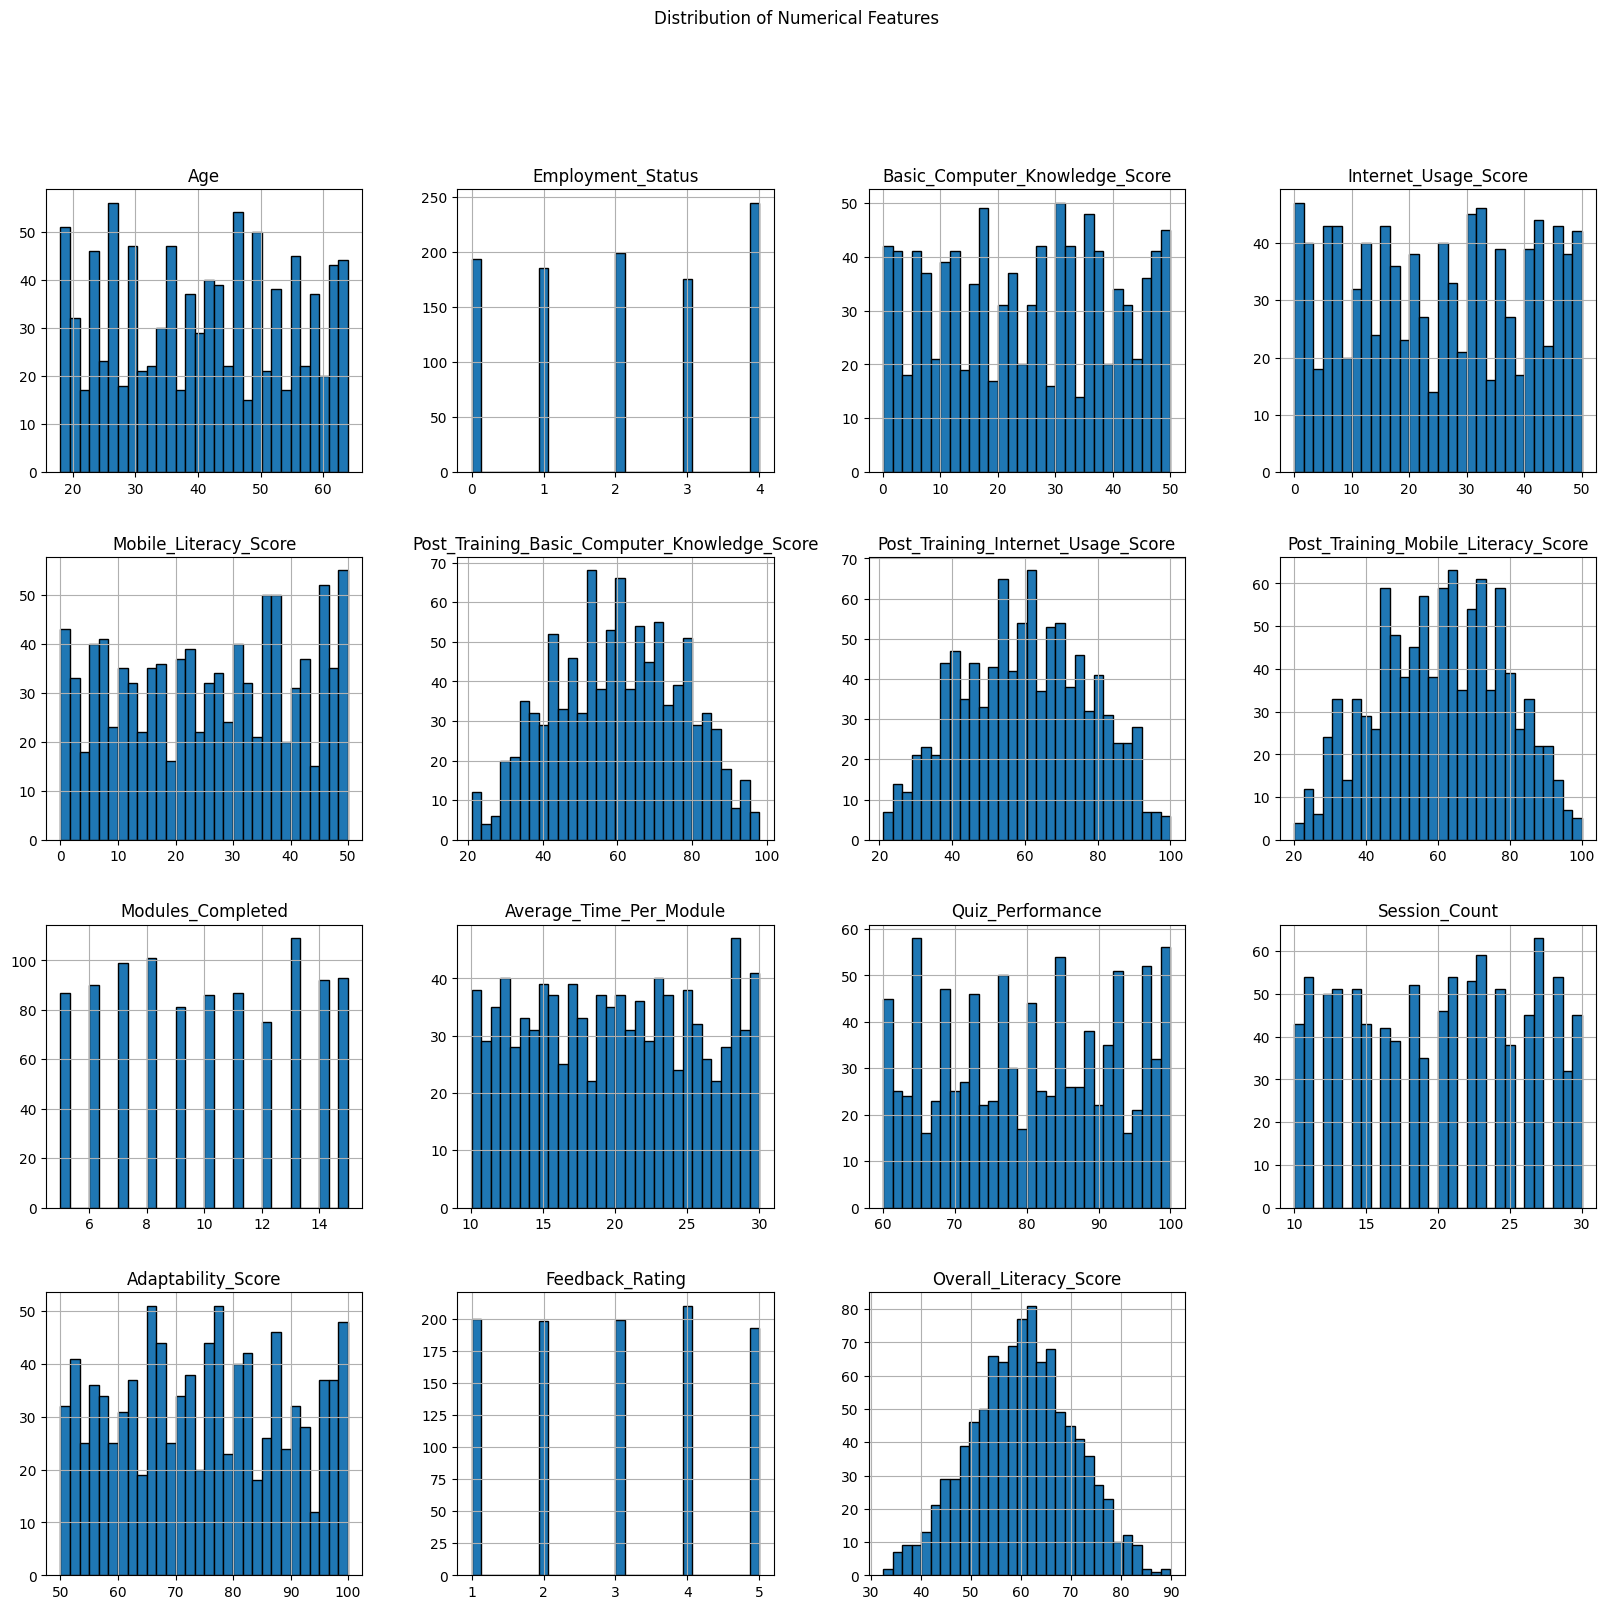

In [512]:
# Histogram of Numerical Features
reg_df.hist(figsize=(20, 18), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

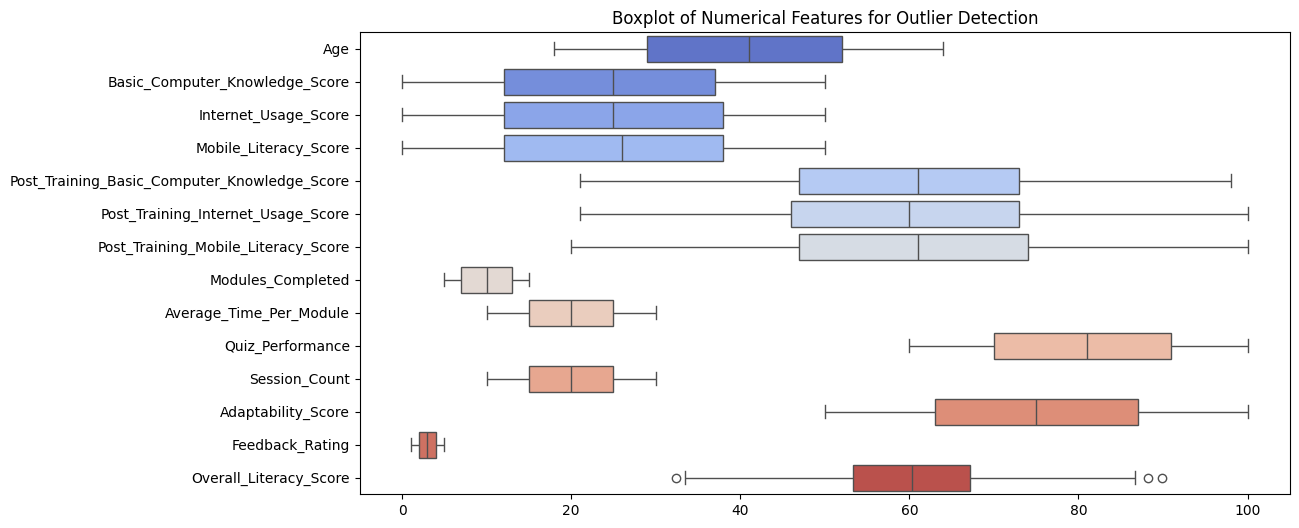

In [513]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=reg_df.select_dtypes(include=['int64', 'float64']), orient="h", palette="coolwarm")
plt.title("Boxplot of Numerical Features for Outlier Detection")
plt.show()

In [514]:
reg_df.shape

(1000, 15)

# **Removing Outliers**

Removing outliers is an important step in data preprocessing, as outliers can skew the results and impact the performance of machine learning models. Outliers are data points that significantly differ from other observations and might be the result of errors or rare occurrences.

In [515]:
# Define the column name
column = "Overall_Literacy_Score"

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = reg_df[column].quantile(0.25)
Q3 = reg_df[column].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
reg_df = reg_df[(reg_df[column] >= lower_bound) & (reg_df[column] <= upper_bound)]
reg_df.shape

(997, 15)

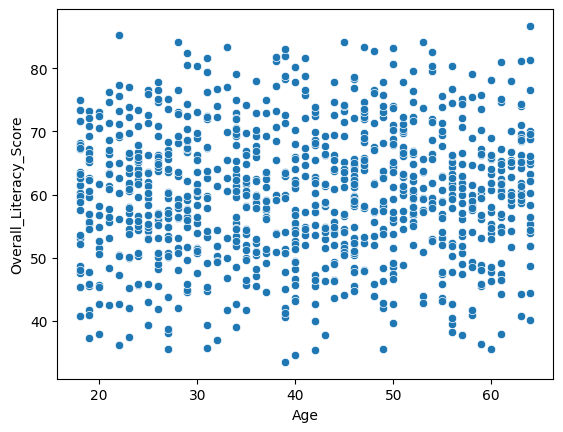

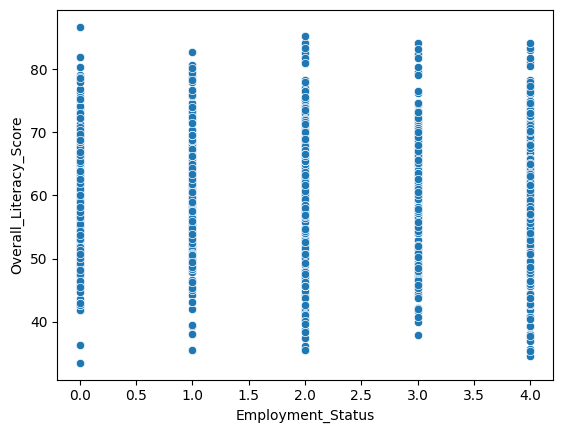

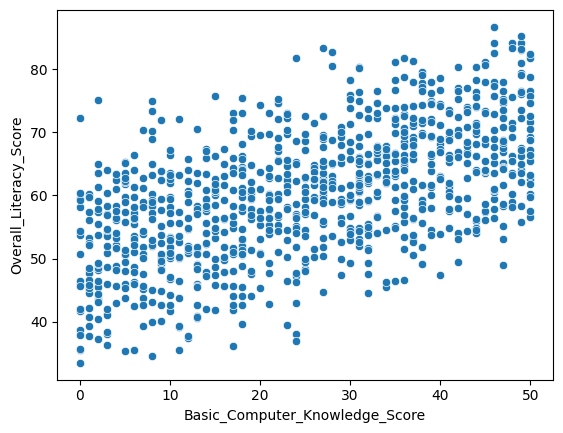

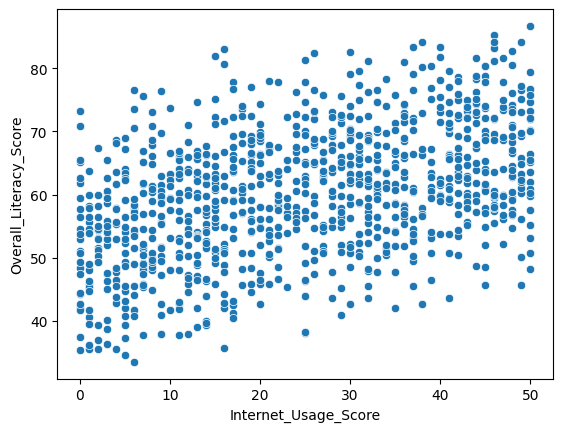

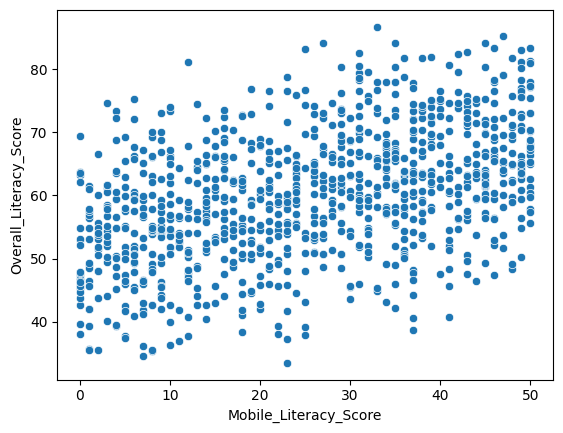

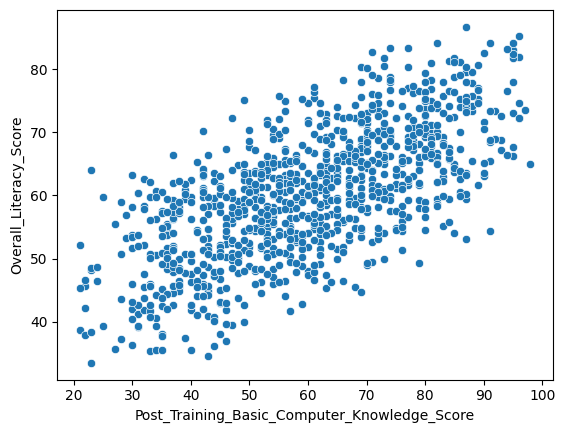

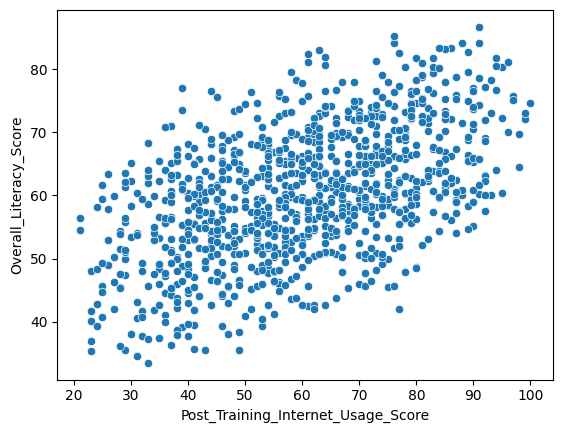

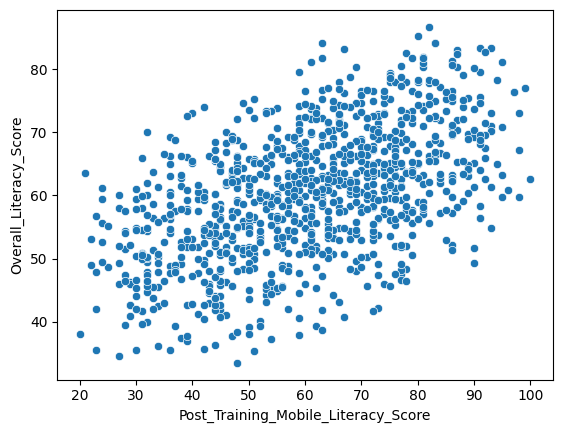

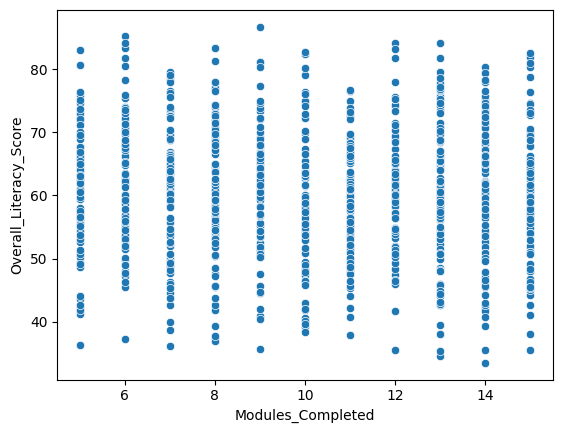

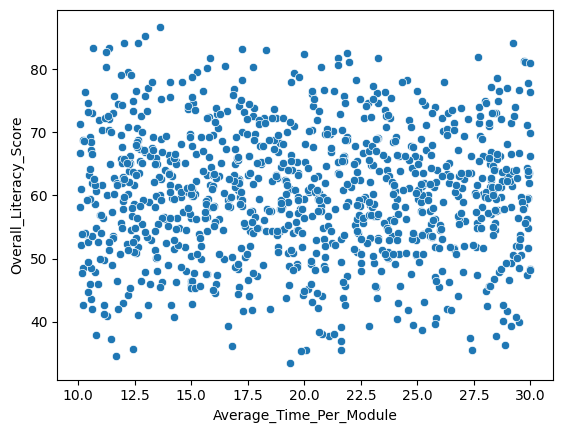

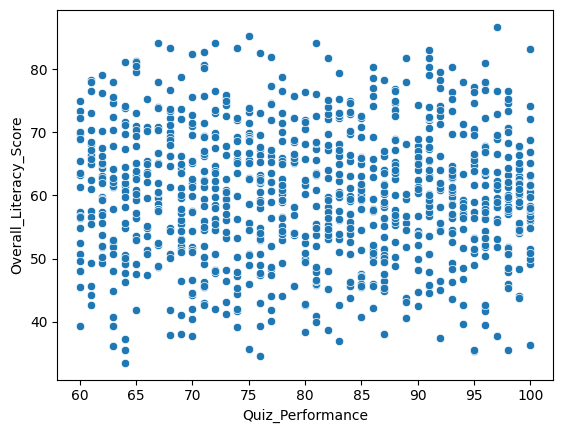

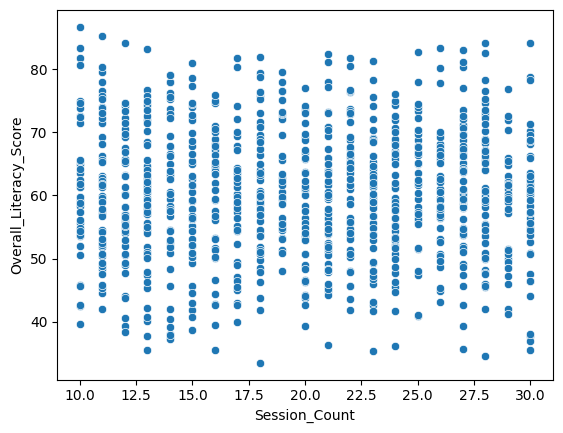

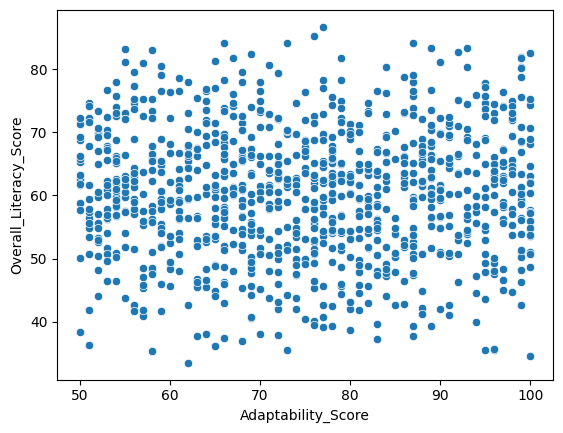

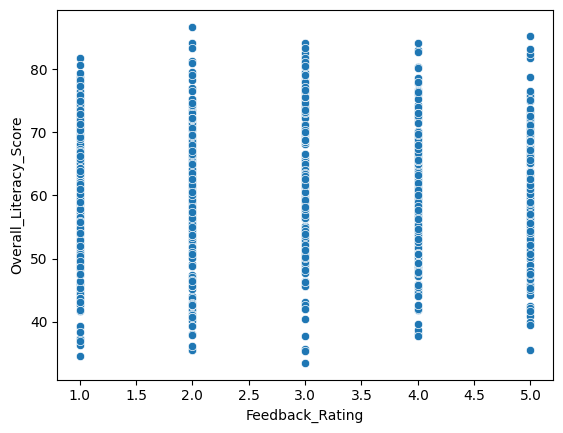

In [516]:
# Scatter Plot
for i in ['Age', 'Employment_Status','Basic_Computer_Knowledge_Score',
       'Internet_Usage_Score', 'Mobile_Literacy_Score',
       'Post_Training_Basic_Computer_Knowledge_Score',
       'Post_Training_Internet_Usage_Score',
       'Post_Training_Mobile_Literacy_Score', 'Modules_Completed',
       'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
        'Adaptability_Score', 'Feedback_Rating']:
       sns.scatterplot(data=reg_df, x=i, y='Overall_Literacy_Score')
       plt.show()

In [517]:
reg_correlation_matrix = reg_df.corr()
reg_correlation_matrix

,Age,Employment_Status,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,Post_Training_Internet_Usage_Score,Post_Training_Mobile_Literacy_Score,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Adaptability_Score,Feedback_Rating,Overall_Literacy_Score
Age,1.000000,0.026549,0.025588,0.014571,0.023116,0.034960,0.022805,0.019532,0.011658,-0.048382,0.007063,0.019014,0.011918,0.010241,0.045530
Employment_Status,0.026549,1.000000,0.003939,0.032464,-0.035931,-0.016363,0.014118,-0.050872,-0.004245,0.011263,-0.009022,0.029070,-0.018098,-0.009326,-0.030034
Basic_Computer_Knowledge_Score,0.025588,0.003939,1.000000,-0.008119,0.022819,0.859292,-0.000045,0.014296,-0.021201,-0.017430,0.023603,-0.018771,-0.009498,0.002691,0.587683
Internet_Usage_Score,0.014571,0.032464,-0.008119,1.000000,0.006484,-0.004431,0.859047,-0.000818,-0.054638,-0.035797,-0.030235,-0.040513,-0.021456,0.031800,0.441917
Mobile_Literacy_Score,0.023116,-0.035931,0.022819,0.006484,1.000000,0.007897,0.024440,0.861102,-0.032748,0.052494,-0.052484,0.016315,0.071619,0.003617,0.463222
Post_Training_Basic_Computer_Knowledge_Score,0.034960,-0.016363,0.859292,-0.004431,0.007897,1.000000,0.005997,0.004525,0.001681,-0.062981,0.010462,-0.006649,-0.014992,0.005720,0.680789
Post_Training_Internet_Usage_Score,0.022805,0.014118,-0.000045,0.859047,0.024440,0.005997,1.000000,0.000912,-0.069661,-0.003987,-0.003899,-0.016809,0.011859,0.040212,0.522925
Post_Training_Mobile_Literacy_Score,0.019532,-0.050872,0.014296,-0.000818,0.861102,0.004525,0.000912,1.000000,-0.009279,0.049242,-0.044030,0.037312,0.030471,0.027163,0.520563
Modules_Completed,0.011658,-0.004245,-0.021201,-0.054638,-0.032748,0.001681,-0.069661,-0.009279,1.000000,0.046005,0.020398,0.043570,-0.001935,0.041987,-0.039775
Average_Time_Per_Module,-0.048382,0.011263,-0.017430,-0.035797,0.052494,-0.062981,-0.003987,0.049242,0.046005,1.000000,0.010963,-0.063120,-0.023408,0.042530,-0.019140


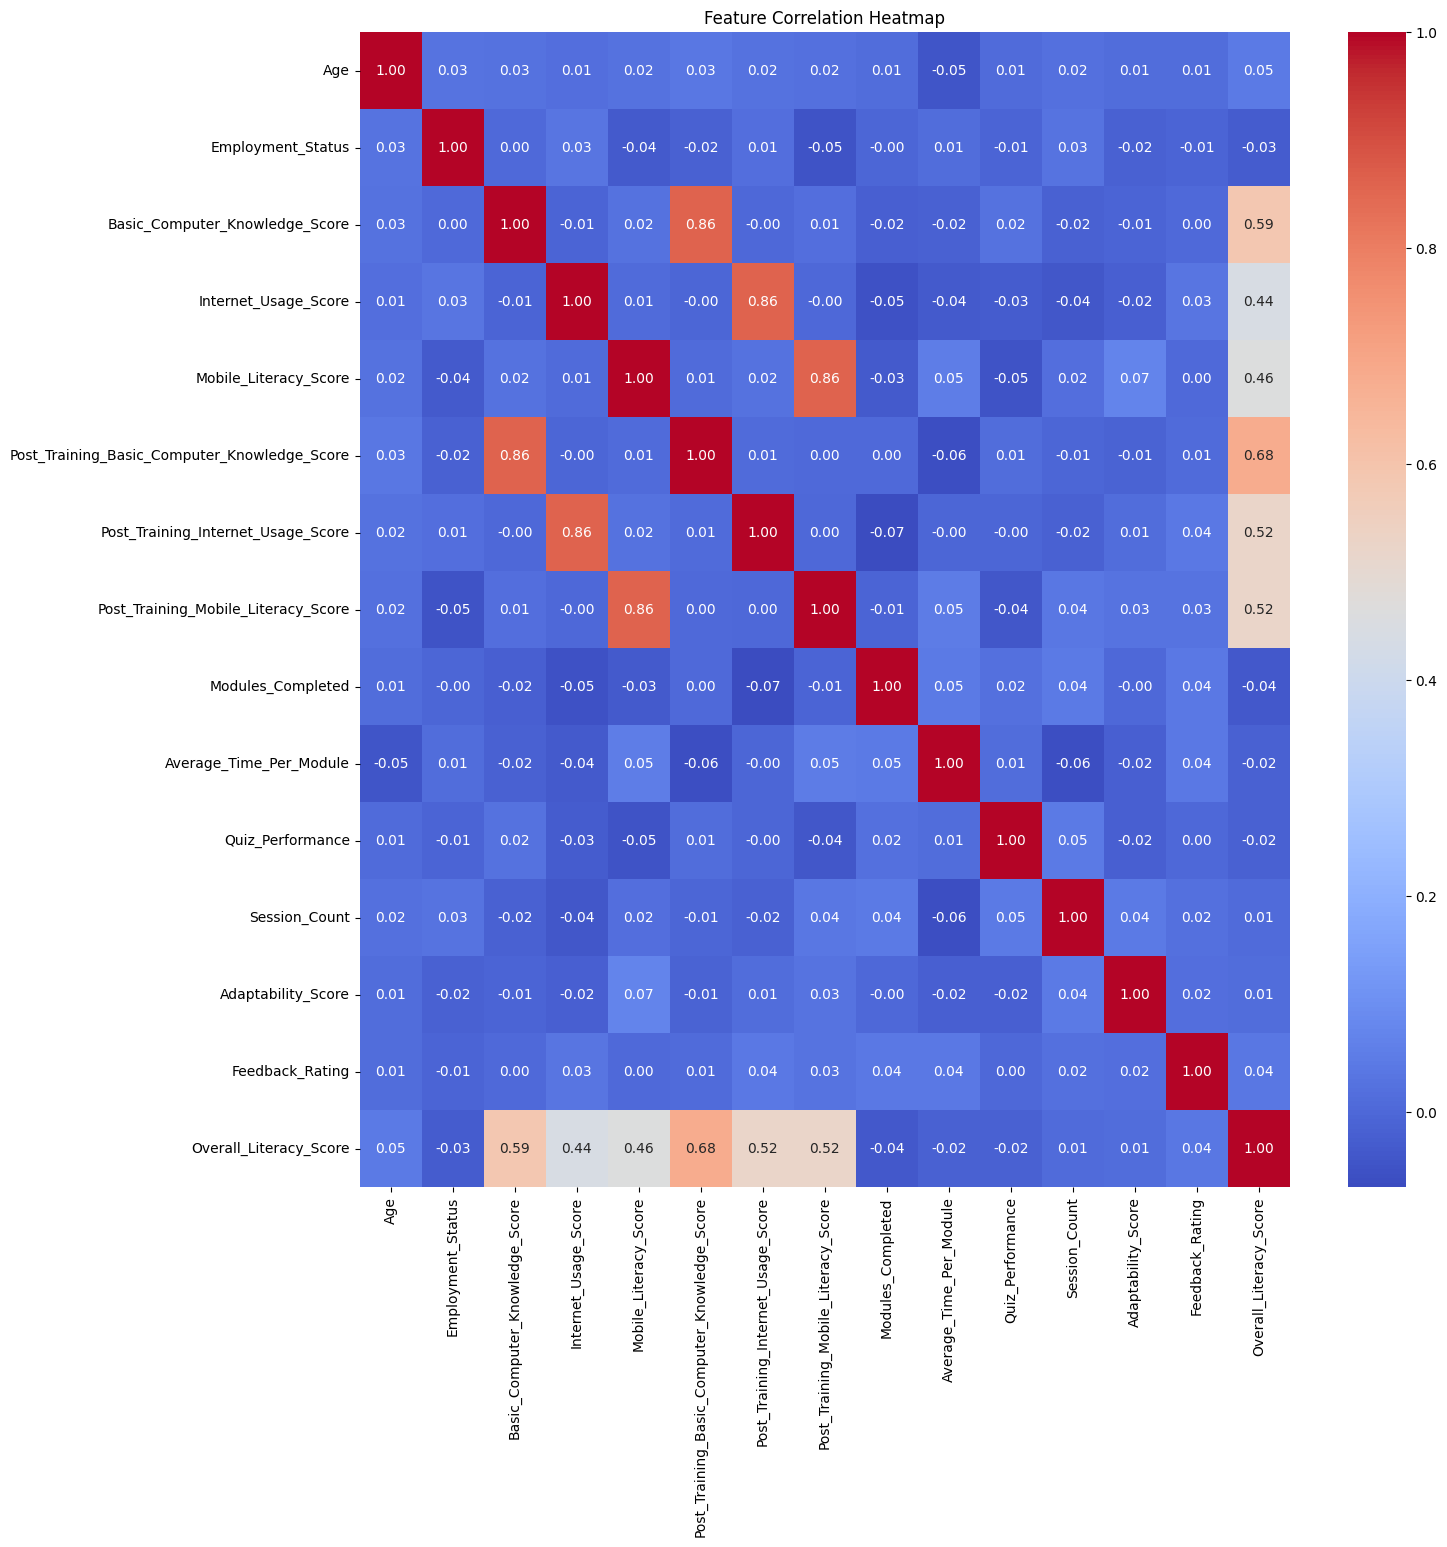

In [518]:
# Plot Heatmap of all feature correlations
plt.figure(figsize=(15, 15))
sns.heatmap(reg_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

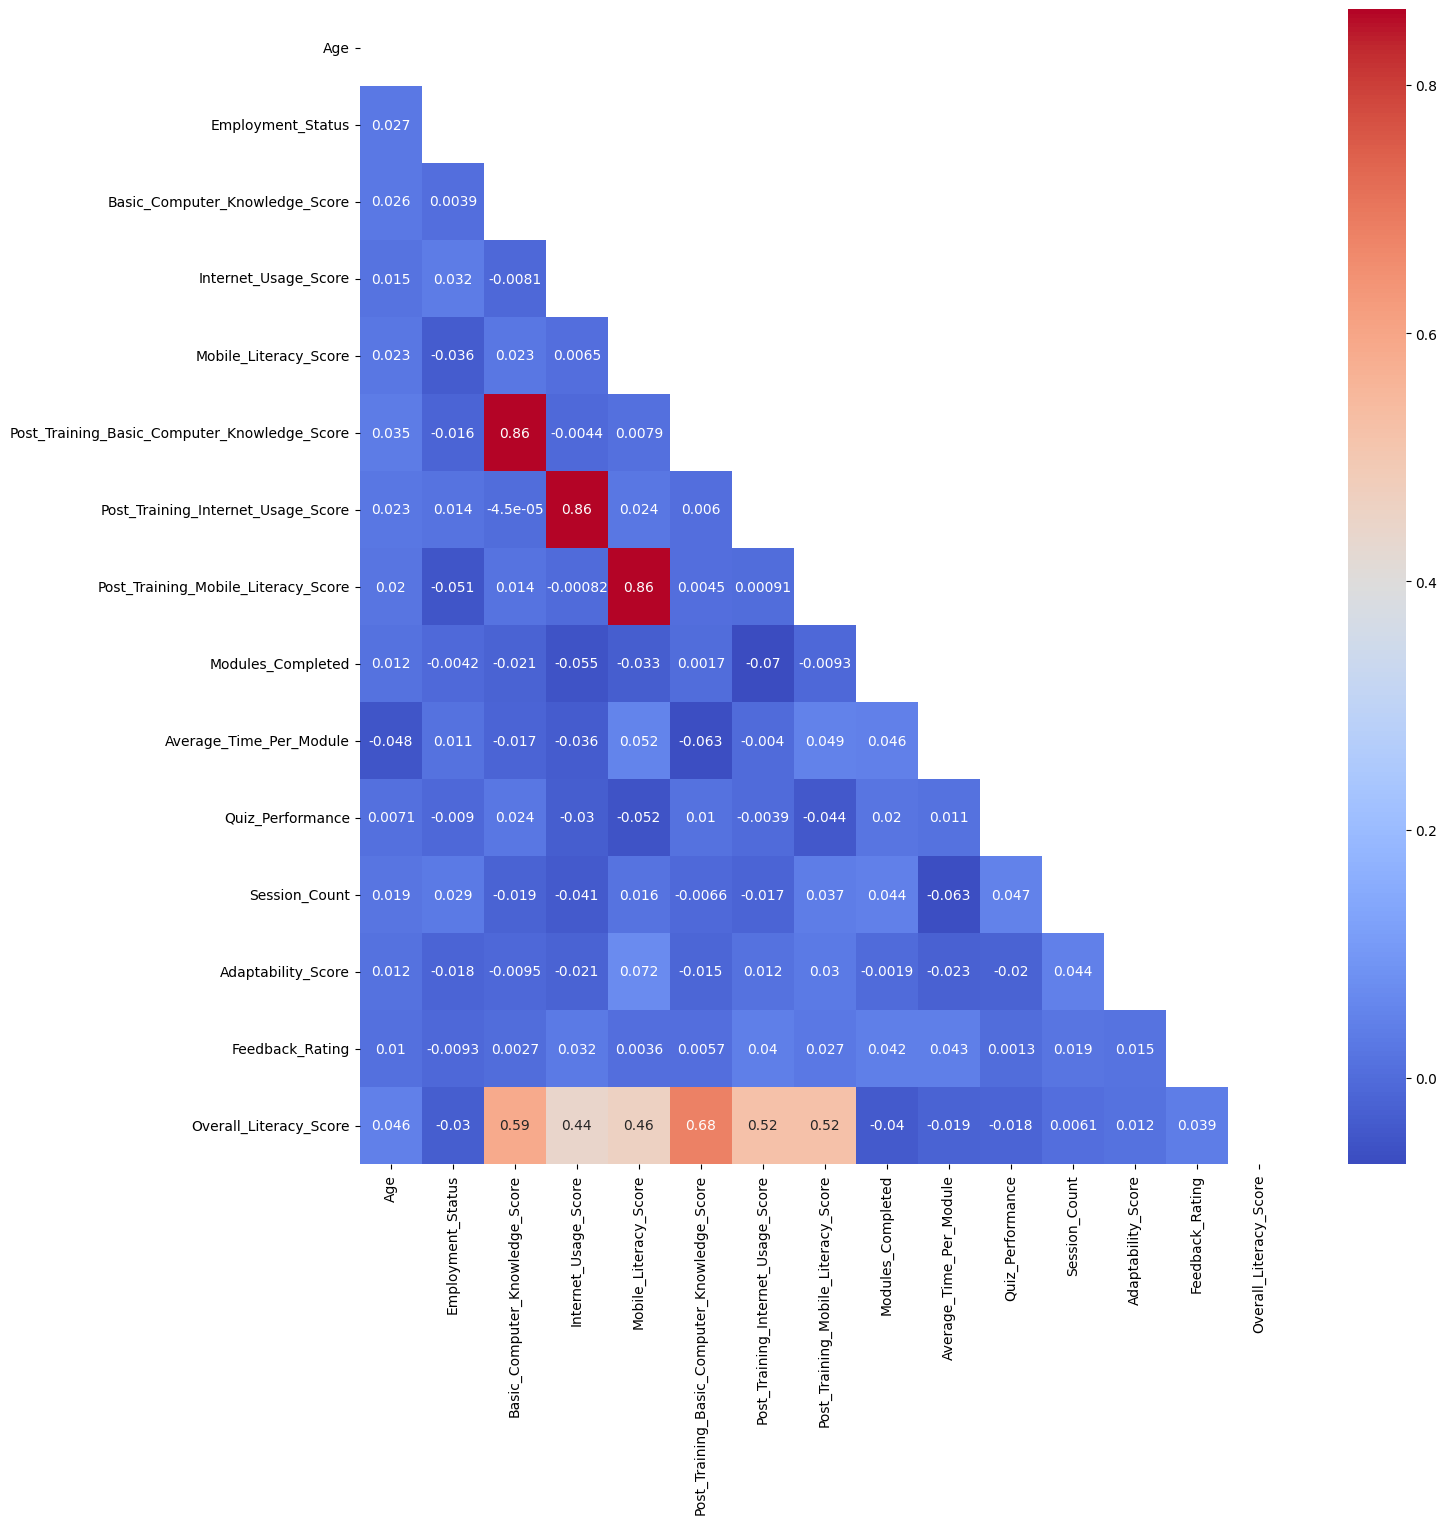

In [519]:
# Set the threshold for considering a correlation as "high"
threshold = 0.8

# Find pairs of highly correlated columns
upper_triangle = reg_correlation_matrix.where(np.triu(np.ones(reg_correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

corr = reg_df.corr()
matrix = np.triu(corr)  # For triangular matrix
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm')
plt.show()

In [520]:
# Drop the highly correlated columns
reg_df_reduced = reg_df.drop(columns=to_drop)

# Display dropped columns and remaining columns
print(f"\nColumns dropped: {to_drop}")
print(f"\nRemaining columns: {reg_df_reduced.columns.tolist()}")


Columns dropped: ['Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score']

Remaining columns: ['Age', 'Employment_Status', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Overall_Literacy_Score']


# **Linear Regression From Scratch for Regression**

In [521]:
# Extract features and target variable
features = ['Age', 'Employment_Status', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
            'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
            'Adaptability_Score', 'Feedback_Rating']
X = reg_df_reduced[features].values
y = reg_df_reduced["Overall_Literacy_Score"].values

# Normalize features (Min-Max Scaling)
def normalize(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X = normalize(X)

# Add a bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]  # Add ones as first column

# Train-test split (80-20)
def train_test_split(X, y, test_size=0.2):
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initialize weights
theta = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000
m = len(y_train)

# Gradient Descent for Linear Regression
for epoch in range(epochs):
    predictions = X_train.dot(theta)
    errors = predictions - y_train
    gradient = (1/m) * X_train.T.dot(errors)
    theta -= learning_rate * gradient

    # Compute Mean Squared Error (MSE)
    loss = (1/(2*m)) * np.sum(errors**2)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Predictions on Train and Test data
y_train_pred = X_train.dot(theta)
y_test_pred = X_test.dot(theta)

# Compute evaluation metrics
def evaluate(y_true, y_pred):
    mse = np.mean((y_pred - y_true) ** 2)
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2_score = 1 - (ss_residual / ss_total)
    return mse, r2_score

# Train set evaluation
train_mse, train_r2 = evaluate(y_train, y_train_pred)

# Test set evaluation
test_mse, test_r2 = evaluate(y_test, y_test_pred)

# Print final performance
print("\nFinal Model Performance:")
print("Training Data:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R-squared (R²) Score: {train_r2:.4f}")

print("\nTest Data:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R-squared (R²) Score: {test_r2:.4f}")

print("\nFinal Model Parameters (Theta):")
print(theta)


Epoch 0: Loss = 1884.9282
Epoch 100: Loss = 46.7459
Epoch 200: Loss = 40.8981
Epoch 300: Loss = 36.6497
Epoch 400: Loss = 33.1406
Epoch 500: Loss = 30.2357
Epoch 600: Loss = 27.8253
Epoch 700: Loss = 25.8199
Epoch 800: Loss = 24.1471
Epoch 900: Loss = 22.7473

Final Model Performance:
Training Data:
Mean Squared Error (MSE): 43.1448
R-squared (R²) Score: 0.5734

Test Data:
Mean Squared Error (MSE): 36.9025
R-squared (R²) Score: 0.6676

Final Model Parameters (Theta):
[20.65147902  5.22775687  2.69630383 16.38743163 14.05586965 13.83228991
  3.33717834  4.63708272  4.64689939  4.73711641  4.98412248  3.80214198]


The linear regression model shows a decrease in loss from 1884.93 to 22.75 over 1,000 epochs, indicating the model improved as it learned. The final performance has a **Mean Squared Error (MSE)** of 43.1448 and an **R² score** of 0.5734 on training and 36.9025 and 0.6676 on testing data, meaning the model explains about 57.34% on training and 66.76% on testing of the variance in the target variable. The model's parameters (coefficients) reflect the influence of each feature on the predictions. Overall, the model performs reasonably well but could be further optimized.

# **Decision tree for Regression**

In [522]:
# Train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_regressor.fit(X_train, y_train)

# Predictions on Train and Test data
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Evaluate model
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("\nDecision Tree Regressor Performance:")
print("Training Data:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R-squared (R²) Score: {train_r2:.4f}")

print("\nTest Data:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R-squared (R²) Score: {test_r2:.4f}")

plt.show()


Decision Tree Regressor Performance:
Training Data:
Mean Squared Error (MSE): 25.7325
R-squared (R²) Score: 0.7455

Test Data:
Mean Squared Error (MSE): 42.2218
R-squared (R²) Score: 0.6197


On training data the decision tree regression model has a **Mean Squared Error (MSE)** of 25.7325 and **R-squared score** of 0.7455 and on Testing data MSE is 42.2218 and RSS is 0.6197, meaning it explains about 62% of the variance on testing and 74% on training data. While it's a decent model, there's room for improvement in performance through tuning or feature engineering.

# **Hyper Parameter Tuning with Decision Tree for Regression Task**

In [523]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
dt_best = grid_search.best_estimator_

# Evaluate model
y_pred = dt_best.predict(X_test)
print(f"Best Parameters:\n {grid_search.best_params_}")

# Output results
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'R-squared Score: {r2_score(y_test, y_pred):.4f}')

Best Parameters:
 {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error: 42.2218
R-squared Score: 0.6197


After hyperparameter tuning with **max_depth** set to 5, **min_samples_leaf** to 2, and **min_samples_split** to 10, the decision tree regression model still has a **Mean Squared Error (MSE)** of 42.22 and an **R-squared score** of 0.6197. This indicates that while the tuning improved model efficiency, performance remains the same, and further adjustments may be needed for better accuracy.

# **Features Selection with Decision Tree for Regression Task**

Selected Features:
 ['Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed']

Decision Tree Regressor Performance with Feature Selection:
Mean Squared Error: 40.6591
R-squared Score: 0.6338


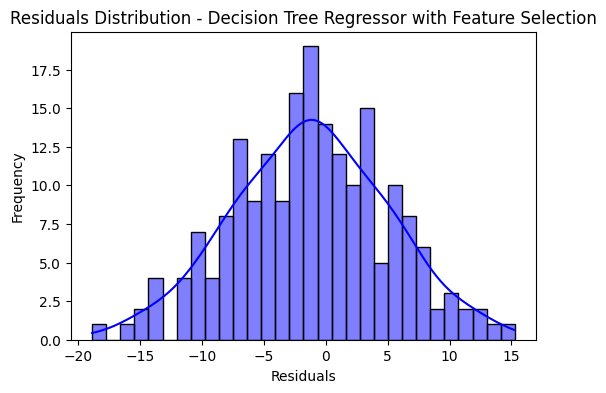

In [524]:
# Train Decision Tree Regressor with best parameters
dt_best = grid_search.best_estimator_

# Get feature importances
feature_importances = dt_best.feature_importances_
feature_names = Features  # Get column names

# Select top features based on importance threshold
importance_threshold = 0.01  # Adjust threshold as needed
important_features = [feature_names[i] for i in range(len(feature_importances)) if feature_importances[i] > importance_threshold]

# Print selected feature names
print("Selected Features:\n", important_features)

# Reduce dataset to selected features
X_train_selected = X_train[:, [Features.index(col) for col in important_features]]
X_test_selected = X_test[:, [Features.index(col) for col in important_features]]

# Retrain Decision Tree Regressor on selected features
dt_regressor_selected = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
dt_regressor_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = dt_regressor_selected.predict(X_test_selected)

# Evaluate Decision Tree Regressor
print("\nDecision Tree Regressor Performance with Feature Selection:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_selected):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_selected):.4f}")

# Confusion Matrix (Not typically used for regression, so using residuals visualization)
plt.figure(figsize=(6, 4))
sns.histplot(y_test - y_pred_selected, bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution - Decision Tree Regressor with Feature Selection")
plt.show()


After feature selection, the decision tree regressor used the following features: **'Internet_Usage_Score'**, **'Mobile_Literacy_Score'**, and **'Modules_Completed'**. With these selected features, the model's performance improved slightly, achieving a **Mean Squared Error (MSE)** of 40.66 and an **R-squared score** of 0.6338, meaning it explains about 63.38% of the variance. This indicates that feature selection helped improve model performance by focusing on the most relevant predictors. However, there is still room for further improvements through other techniques.

#**Random forest for Regression**

In [525]:
# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Compute evaluation metrics for train data
mse_train = mean_squared_error(y_train, y_train_pred_rf)
r2_train = r2_score(y_train, y_train_pred_rf)

# Compute evaluation metrics for test data
mse_test = mean_squared_error(y_test, y_test_pred_rf)
r2_test = r2_score(y_test, y_test_pred_rf)


# Output results
print("\nRandom Forest Regression Performance:")
print("\nTraining Data:")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"R-squared Score: {r2_train:.4f}")

print("\nTest Data:")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"R-squared Score: {r2_test:.4f}")


Random Forest Regression Performance:

Training Data:
Mean Squared Error: 5.3010
R-squared Score: 0.9476

Test Data:
Mean Squared Error: 31.9348
R-squared Score: 0.7124


On training data, the Random Forest regression model has an MSE of 5.3010 and an R-squared score of 0.9476, and On testing data, MSE is 31.9348 and RSC is 0.7124 indicating it explains 71.24% of the target variable's variance on testing and 94% on training. This suggests improved accuracy and generalization compared to previous models, likely due to its ensemble nature reducing overfitting.

# **Hyper Tuning with Random Forest for Regression Task**

In [526]:
# Define parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
dt_best = grid_search.best_estimator_

# Evaluate model
y_pred = dt_best.predict(X_test)
print(f"Best Parameters: \n{grid_search.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f'R-squared Score: {r2_score(y_test, y_pred):.4f}')

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_regressor.predict(X_test)

# Compute evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output results
print(f'\nRandom Forest Model Performance:')
print(f'Mean Squared Error: {mse_rf:.4f}')
print(f'R-squared Score: {r2_rf:.4f}')


Best Parameters: 
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error: 42.2218
R-squared Score: 0.6197

Random Forest Model Performance:
Mean Squared Error: 31.9348
R-squared Score: 0.7124


After hyperparameter tuning, the Random Forest regression model achieved an MSE of 42.22 and an R-squared score of 0.6197 with the best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}. However, the original Random Forest model performed better with an MSE of 31.93 and an R-squared score of 0.7124.

# **Features Selection with Random Forest for Regression Task**


Selected Features:
 ['Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed']

Decision Tree Regressor Performance with Feature Selection:
Mean Squared Error: 40.6591
R-squared Score: 0.6338


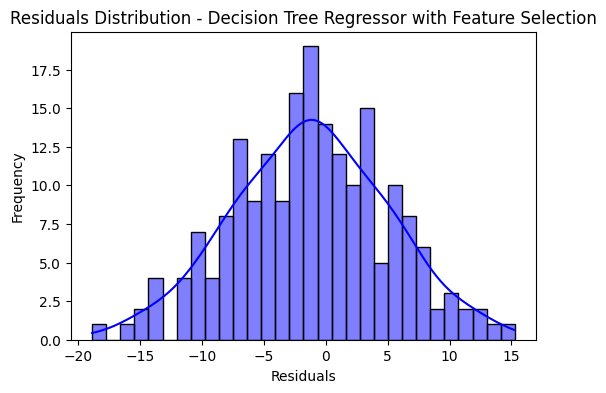

In [527]:
# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_
feature_names = Features  # Get column names

# Select top features based on importance threshold
importance_threshold = 0.01  # Adjust threshold as needed
important_features = [feature_names[i] for i in range(len(feature_importances)) if feature_importances[i] > importance_threshold]

# Print selected feature names
print("Selected Features:\n", important_features)

# Reduce dataset to selected features
X_train_selected = X_train[:, [Features.index(col) for col in important_features]]
X_test_selected = X_test[:, [Features.index(col) for col in important_features]]

# Retrain Decision Tree Regressor on selected features
dt_model_selected = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
dt_model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_dt = dt_model_selected.predict(X_test_selected)

# Evaluate Decision Tree Regressor
print("\nDecision Tree Regressor Performance with Feature Selection:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_dt):.4f}")

# Residual Plot
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred_dt, bins=30, kde=True, color='blue')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution - Decision Tree Regressor with Feature Selection")
plt.show()


After feature selection, the selected features for the Random Forest regression model are: ['Internet_Usage_Score', 'Mobile_Literacy_Score', 'Modules_Completed']. The Decision Tree Regressor with these selected features achieved an MSE of 40.66 and an R-squared score of 0.6338.

# **Final Model With Random Forest (Regression)**


In [528]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Optimized Random Forest Model
best_reg_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_reg_model.fit(X_train_selected, y_train)

# Predictions on Train and Test data
y_train_pred = best_reg_model.predict(X_train_selected)
y_test_pred = best_reg_model.predict(X_test_selected)

# Compute evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print("\nRandom Forest Regressor Performance:")
print("Training Data:")
print(f"Mean Squared Error (MSE): {train_mse:.4f}")
print(f"R-squared (R²) Score: {train_r2:.4f}")

print("\nTest Data:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R-squared (R²) Score: {test_r2:.4f}")


Random Forest Regressor Performance:
Training Data:
Mean Squared Error (MSE): 5.1926
R-squared (R²) Score: 0.9512

Test Data:
Mean Squared Error (MSE): 28.0221
R-squared (R²) Score: 0.6959


The final Random Forest regression model achieved an MSE of 5.19 and an R-squared score of 0.9512 on Training, and MSE 28.02 and R-Sc of 0.6959 on Testing, indicating strong performance and good prediction accuracy.